<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/Text_strikethrough_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ----CAPTCHA-RECOGNITION---

In [0]:
!pip install pillow
!pip install pytesseract
!sudo apt-get install tesseract-ocr-eng


In [0]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image as pyimg, display
from PIL import Image
import pytesseract
import argparse

**#function remove strike through lines from captcha-images**

In [0]:

def decode(file, p):
    from PIL import Image
    img = Image.open(file)
    pixelMap = img.load()
    new_img = Image.new( img.mode, img.size)
    pixelsNew = new_img.load()
    length, height = new_img.size
    colors = dict()
    maxcount = 0
    maxline = 0
    for i in range(height):
        count = 0
        for j in range(length):
            pixelsNew[j,i] = pixelMap[j,i]
            #ignoring boundries
            if(i>4 and i<height-4 and j>4 and j<length-4):
                #get red pixel count
                r,g,b = pixelMap[j,i]
                if(r>g+40 and r>b+40):
                    count += 1
        if(count>maxcount):
            maxline = i
            maxcount = count
    for j in range(length):
        ru,gu,bu = pixelMap[j,maxline-1]
        rd,gd,bd = pixelMap[j,maxline+1]
        pixelsNew[j,maxline] = (int(ru+rd)//2,int(gu+gd)//2,int(bu+bd)//2)
    img.close()
    new_img.show()       
    new_img.save("captchas-jpg/" + "out" + str(p) + ".jpg") 
    new_img.close()

**#function to convert clean captcha into grayscale and text generation(captcha recognition) using tesseract**

In [0]:

def deco(file_name):
    display(pyimg(file_name))
    image = cv2.imread(file_name)
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.threshold(gray1, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray2, 9)
    #gray3 = cv2.medianBlur(gray, 5)
    cv2.imwrite("gray1.png", gray1)
    cv2.imwrite("gray2.png", gray2)
    display(pyimg("gray1.png"))
    display(pyimg("gray2.png"))
    text = [""]


    text.append(pytesseract.image_to_string(image))
    #print(text)
    text.append(pytesseract.image_to_string(gray1))
    #print(text)
    text.append(pytesseract.image_to_string(gray2))
    #print(text)
    text.append(pytesseract.image_to_string(gray))
    print("text", text)
    #text = pytesseract.image_to_string(gray3)
    #print(text)

In [0]:
"""
image = cv2.imread('/content/captchas-jpg/out1.jpg')
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.threshold(gray1, 0, 255,
    cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
gray = cv2.medianBlur(gray2, 9)
"""

#text = (pytesseract.image_to_string(image, config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
#print(text)
#text = (pytesseract.image_to_string(gray1, config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
#print(text)
#text = (pytesseract.image_to_string(gray2, config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
#print(text)
#text = (pytesseract.image_to_string(gray, config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
#print(text)

In [0]:
mkdir /content/captchas-jpg
i=0
for f in files:
  i+=1
  if '.png' in f:
    decode('/content/captchas/' + f, i)



**CAPTCHA-RECOGNITION examples are shown below**

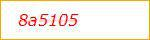

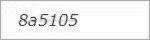

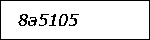

text ['', '825105', '8a5105', '8a5105', '']


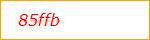

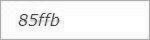

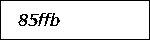

text ['', '85ffb', '85ffb', '85ftb', '']


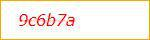

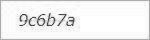

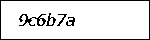

text ['', '9c6b7a', '9c6b7a', 'Se6b7a', '']


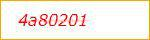

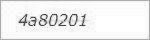

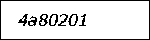

text ['', '4980201', '4280201', '4280201', '']


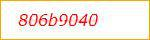

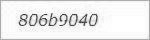

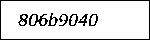

text ['', '80669040', '806b9040', '806b9040', '']


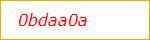

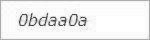

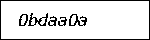

text ['', 'Obdaa0a', 'Obdaa0a', 'Obdaadea', '']


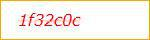

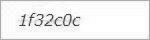

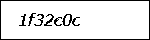

text ['', '1f32c0€', '1f32c0€', '4f32€0c', '']


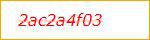

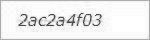

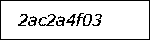

text ['', '2ac2a4fo3', '2ac2a4f03', '2ac2a4f03', '']


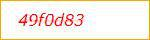

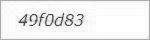

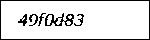

text ['', '49f0d83', '49f0d83', '49F0d82', '']


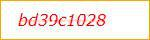

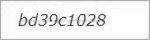

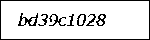

text ['', 'bd39¢1028', 'bd39¢1028', 'bd39c1028', '']


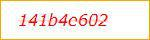

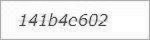

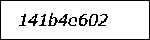

text ['', '141b4e602', '141b4c602', '141b4c602', '']


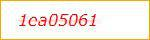

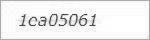

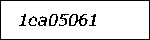

text ['', '1ea05061', '1ea05061', '1ea05064', '']


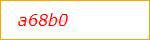

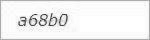

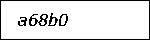

text ['', '368b0', '268b0', 'a68b0', '']


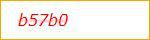

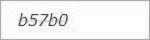

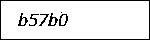

text ['', 'b57b0', 'b57b0', 'b57b0', '']


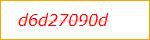

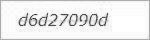

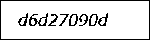

text ['', 'd6d27090d', 'd6d27090d', 'd6d27090d', '']


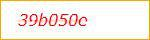

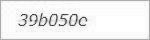

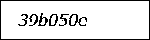

text ['', '39b0500', '39b050e', '39b0500', '']


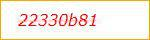

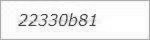

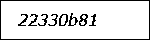

text ['', '22330b81', '22330b81', '22330b81', '']


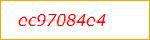

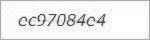

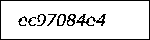

text ['', '', '0c9708404', 'CcD708404', '']


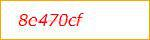

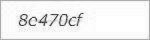

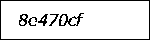

text ['', '', '80470cF', '8e470cF', '']


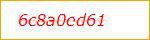

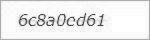

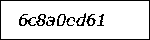

text ['', '6c8300d61', '6c8a0cd61', '6c8a0ed61', '']


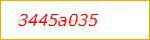

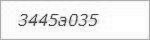

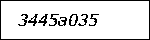

text ['', '34458035', '34458035', '34453035', '']


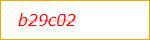

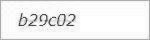

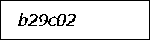

text ['', 'b29c02', 'b29¢02', 'b29c02', '']


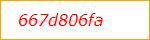

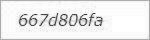

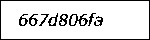

text ['', '667¢806Fa', '667d806fa', '667d806fa', '']


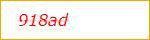

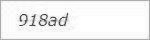

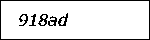

text ['', '918ad', '918ad', '918ad', '']


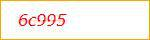

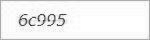

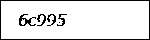

text ['', '6c995', '60995,', '6c995,', '']


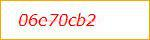

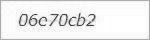

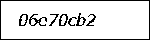

text ['', '06e70cb2', '06e70cb2', '06070cb2', '']


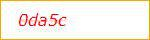

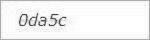

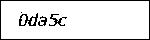

text ['', '', '', '', '']


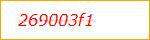

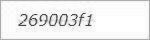

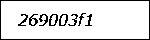

text ['', '269003F1', '269003F1', '26900361', '']


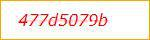

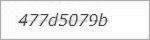

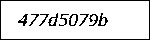

text ['', '477d5079b', '477d5079b', '47745079b', '']


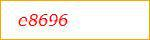

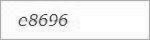

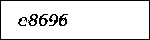

text ['', '08696', '©8696', '©8696', '']


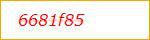

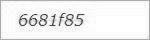

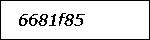

text ['', '6681/85', '6681785', '6681185', '']


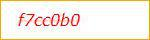

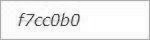

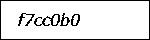

text ['', 'F7ecObO', 'f7ecObO', 'F7ec0bO', '']


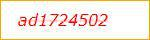

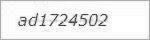

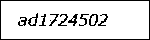

text ['', 'ad1724502', 'ad1724502', 'ad1724502', '']


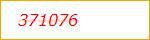

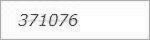

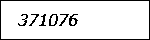

text ['', '(371076', '371076', '371076', '']


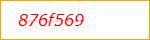

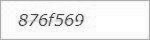

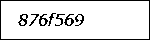

text ['', '876569', '876569', '8766569', '']


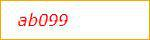

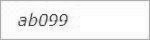

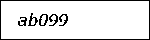

text ['', '2b099', 'ab099', 'abo99', '']


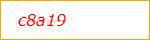

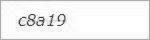

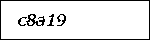

text ['', '8a19', 'c8a19', '8419', '']


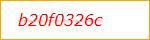

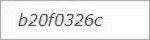

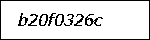

text ['', 'b20f0326c', 'b20f0326¢', 'b20f0326¢', '']


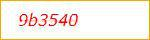

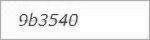

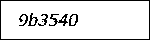

text ['', '963540', '9b3540', '9b3540', '']


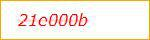

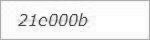

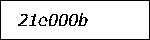

text ['', '2100006', '210000b', '21c000b', '']


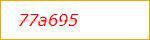

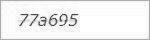

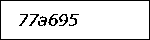

text ['', '778695', '773695,', '773695,', '']


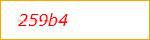

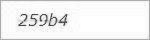

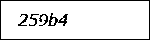

text ['', '259b4', '259b4', '259b4', '']


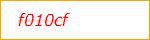

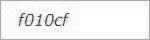

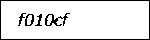

text ['', 'f010cF', 'f010cf', 'f010ef', '']


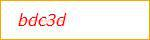

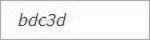

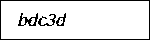

text ['', 'bde3d', 'bde3d', 'bde3zd', '']


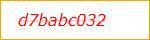

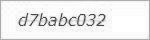

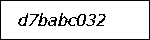

text ['', 'd7babe032', 'd7babc032', 'd7babc032', '']


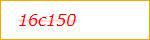

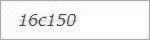

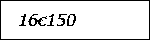

text ['', '16c150', '16150', '16€150', '']


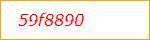

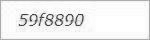

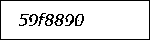

text ['', '59f8890', '59f8890', '59f8890', '']


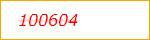

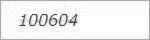

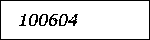

text ['', '100604', '100604', '100604', '']


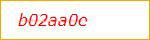

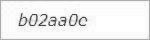

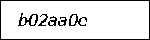

text ['', 'bO2aa0e', 'bO2aa0e', 'bO2aa0e', '']


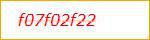

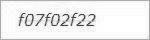

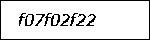

text ['', 'f07f02f22', 'f07f02f22', 'fO7f02f22', '']


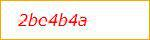

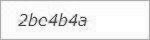

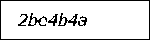

text ['', '‘2be4b4a', '2be4b4a', '2be4b4a', '']


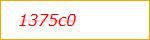

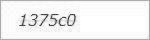

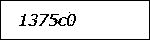

text ['', '1375¢0', '1375¢c0', '1375c0', '']


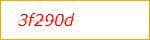

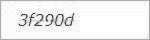

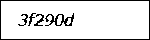

text ['', '3f290d', '3f290d', '3f290d', '']


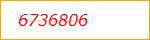

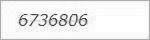

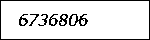

text ['', '6736806', '6736806', '6736806', '']


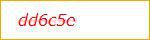

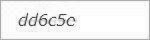

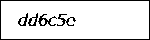

text ['', '', 'dd6c5e', 'dd6c5e', '']


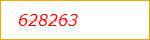

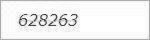

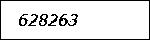

text ['', '628263', '628263', '628263', '']


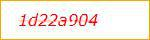

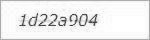

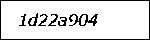

text ['', '1d22a904', '14228904', '1d223904', '']


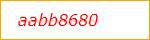

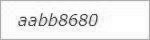

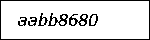

text ['', 'aabb8680', 'a@abb8680', 'aabb8680', '']


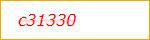

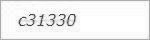

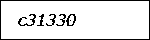

text ['', '31330', '31330', '31330', '']


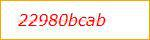

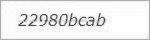

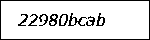

text ['', '22980beab', '22980bcab', '22980bcab', '']


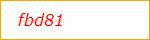

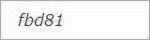

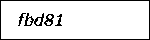

text ['', 'fbd8i', 'fbd81', 'fbd8i', '']


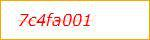

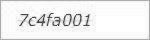

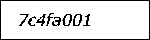

text ['', '‘7eafa001', '7e4fa001', '7e4fa001', '']


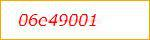

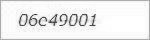

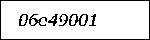

text ['', '06049001', '06¢e49001', '06049001', '']


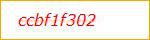

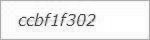

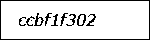

text ['', 'ccbfif302', 'eebf1f302', 'cebfif302', '']


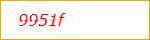

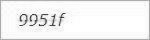

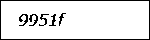

text ['', '9951F', '9951F', '9951F', '']


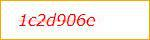

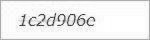

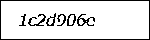

text ['', '41c20906¢', '1¢2d906¢e', '1e2d906e', '']


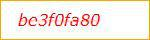

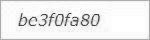

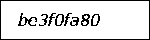

text ['', 'be3fofaso', 'be3f0faso', 'be3f0fa80', '']


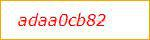

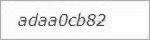

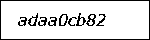

text ['', 'adaa0cb82', 'adaa0cb82', 'adaalcb82', '']


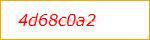

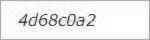

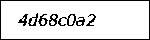

text ['', '4d68c0a2', '4d68c0a2', '4d68c0a2', '']


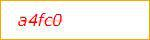

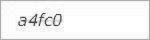

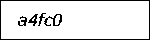

text ['', 'adfco', 'a4fcO', 'adfeo', '']


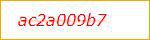

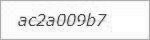

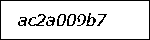

text ['', 'ac2a009b7', 'ac2a009b7', 'ac2a009b7', '']


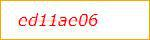

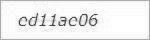

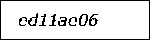

text ['', 'edi1ac06', 'ed11ac06', 'editac06', '']


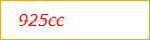

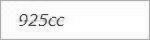

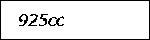

text ['', '925', '925¢¢', '92506', '']


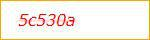

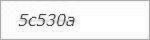

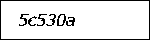

text ['', '55308', '5¢530a', '5€530a', '']


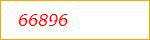

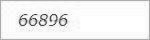

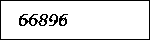

text ['', '', '66896', '66896', '']


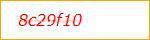

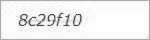

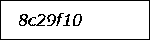

text ['', '8c29f10', '8¢29f10', '8c29F10', '']


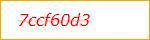

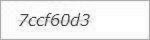

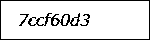

text ['', '', '7ect60d3', '7ech60d3', '']


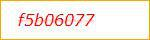

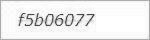

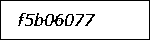

text ['', '#5b06077', '£5b06077', '£5b06077', '']


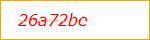

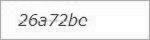

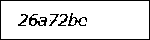

text ['', '26a72be', '26a72be', '26a72be', '']


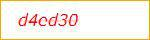

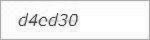

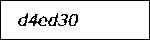

text ['', 'd4ed30', 'd4ed30', 'd4ed30', '']


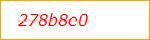

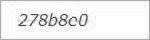

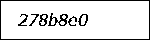

text ['', '278b8c0', '278b8c0', '278b8e0', '']


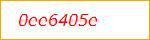

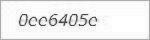

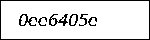

text ['', 'Oce6405¢', 'Oec6405e', 'bec6405e', '']


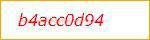

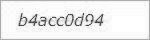

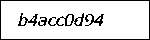

text ['', '', 'b4accod94', 'b4acc0d94', '']


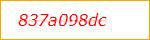

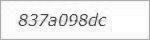

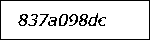

text ['', '837a098de', '837a098de', '837a098de', '']


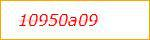

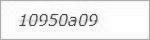

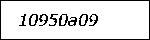

text ['', '10950a09', '10950a09', '10950809', '']


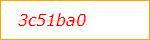

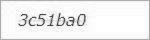

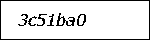

text ['', '3c51ba0', '3c51ba0', '232e51ba0', '']


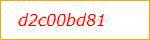

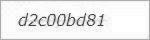

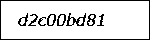

text ['', 'd2c00bd81', 'd2c00bd81', 'd2c00bd81', '']


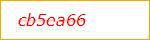

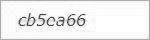

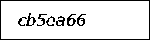

text ['', 'eb5ea66', 'cb5ca66', 'eb5ea66', '']


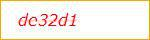

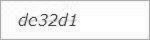

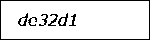

text ['', 'do32dt', 'de32d1', 'deo32dt', '']


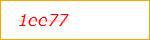

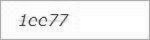

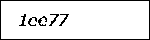

text ['', '1ec77', 'lee77', '1ee77', '']


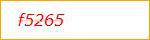

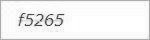

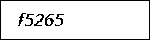

text ['', '£5265', 'F5265', '£5265', '']


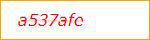

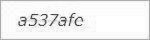

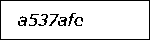

text ['', 'a537afo', 'a537afe', 'a537afo', '']


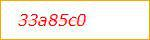

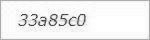

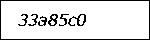

text ['', '', '33a85C0', '332a85€0', '']


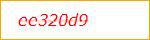

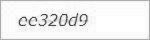

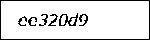

text ['', 'c0320d9', 'ee320d9', 'ee320d9', '']


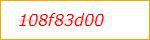

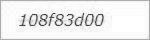

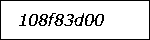

text ['', '108f83d00', '108f83d00', '108f83d00', '']


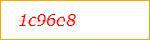

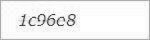

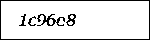

text ['', '10968', '1¢96e8', '1c9608', '']


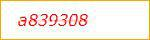

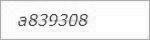

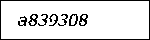

text ['', '2839308', '2839308', '9839308', '']


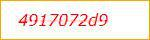

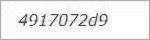

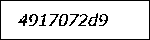

text ['', '491707249', '4917072d9', '491707249', '']


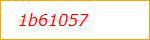

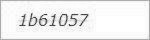

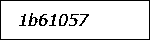

text ['', '1b61057', '1b61057', '1b61057', '']


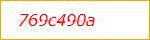

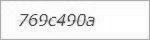

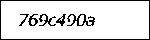

text ['', '769¢490a', '76964908', '76943', '']


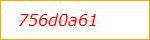

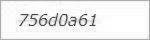

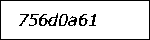

text ['', '‘756d0a61', '756d0a61', '756d0a61', '']


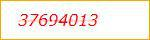

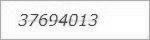

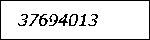

text ['', '37694013', '37694013', '37694013', '']


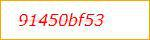

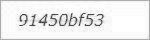

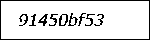

text ['', '91450bf53', '91450bf53', '91450bf53', '']


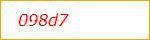

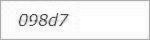

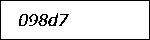

text ['', '098d7', '098d7', '098d7', '']


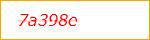

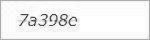

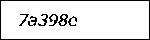

text ['', '(7a398e', '7a398eC', '7a398C', '']


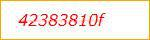

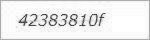

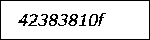

text ['', '42383810F', '42383810F', '42383810F', '']


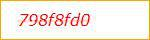

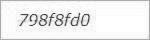

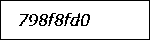

text ['', '798F8fd0', '798f8fdO', '7O8fBFdO', '']


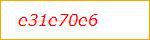

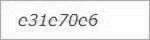

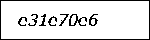

text ['', '03107006', '310706', 'e31¢70c6', '']


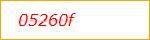

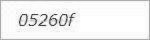

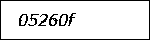

text ['', 'o5260f', '05260f', '05260F', '']


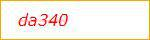

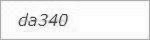

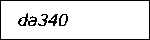

text ['', '', 'da340', 'a340', '']


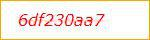

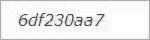

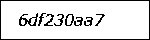

text ['', '6df2303a7', '6df230aa7', '6df230887', '']


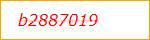

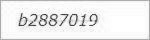

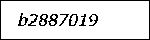

text ['', '2887019', 'b2887019', '62887019', '']


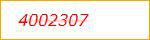

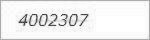

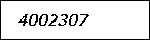

text ['', '', '4002307', '4002307', '']


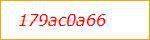

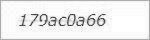

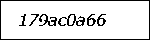

text ['', '179ac0a66', '179ac0a66', '179ac0ab66', '']


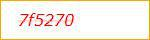

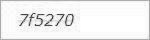

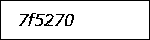

text ['', '765270', '75270', '75270', '']


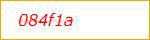

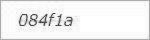

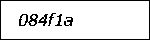

text ['', '084f1a', '084fla', 'O84fla', '']


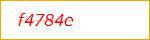

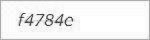

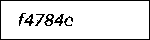

text ['', '‘47840', '£47840', '£47840', '']


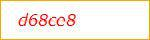

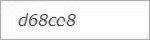

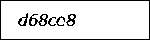

text ['', 'do8ec8', '6808', '68008', '']


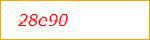

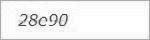

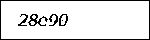

text ['', '28¢90', '28e90', '28690', '']


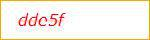

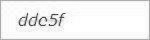

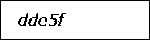

text ['', '', 'ddesf', 'ddest', '']


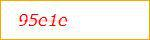

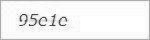

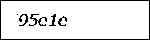

text ['', '95¢e1e', '95e1e', '95e1e', '']


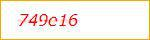

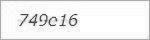

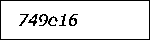

text ['', '749016', '749016', '749016', '']


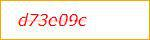

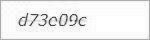

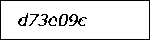

text ['', '73¢09¢', 'd73009¢', 'd73009€', '']


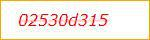

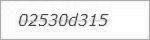

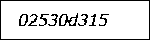

text ['', '025304315', '025304315', '025304315,', '']


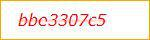

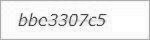

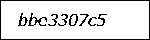

text ['', 'bbe3307¢5', 'bbe3307¢5', 'bbo3307e5', '']


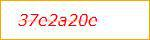

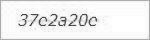

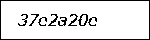

text ['', '3702a20e', '37028200', '37028200', '']


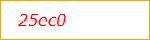

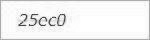

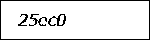

text ['', '25ec0', '25ec0', '25ec0', '']


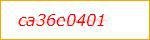

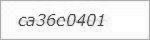

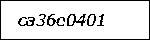

text ['', '93600401', '33600401', '33600404', '']


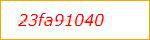

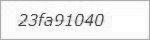

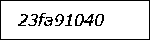

text ['', '23fa91040', '23491040', '23891040', '']


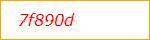

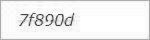

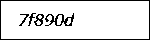

text ['', '7f890d', '7#890d', '7#890d', '']


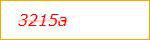

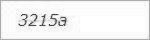

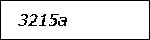

text ['', '(32158', '32158', '32158', '']


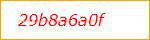

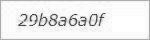

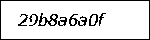

text ['', '29b8a6a0F', '29b8a6a0F', '29b8a6a0F', '']


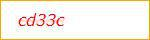

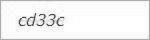

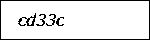

text ['', 'ed33¢', 'cd33¢', 'ed33e', '']


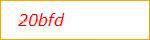

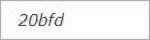

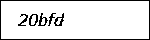

text ['', '20bfd', '20bfd', '20bfd', '']


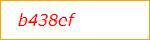

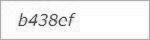

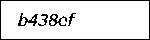

text ['', '‘b4380F', 'b4380F', 'b4380f', '']


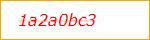

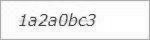

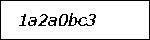

text ['', '4a2a0be3', '1a2a0bc3', 'dtazadbe?', '']


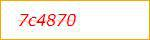

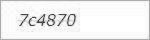

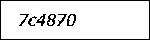

text ['', '‘7e4870', '74870', '74870', '']


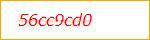

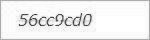

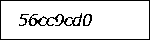

text ['', 's6cc9ed0', 'S6cc9ed0', '56ec9ed0', '']


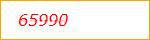

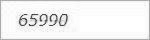

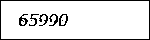

text ['', '65990', '65990', '65990', '']


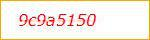

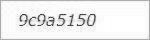

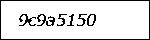

text ['', '9c9a5150', '9¢9a5150', '9985150', '']


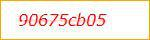

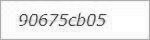

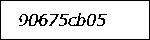

text ['', '90675¢b05', '90675cb05', '90675cb05', '']


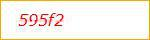

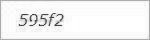

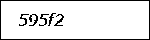

text ['', '595f2', '595f2', '505f2', '']


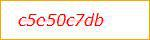

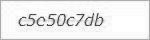

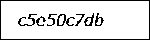

text ['', 'c5e50¢7db-', '5e50¢7db', 'c5e50c7db', '']


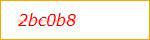

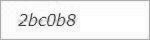

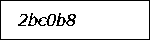

text ['', '2bcOb8', '2be0b8', '2be0b8', '']


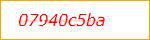

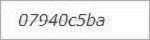

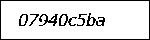

text ['', '07940¢5ba_', '07940c5ba', '07940c5ba', '']


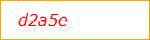

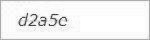

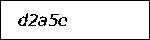

text ['', 'd2a5e', 'd2ase', 'd2ase', '']


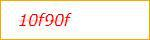

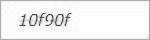

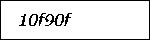

text ['', '10f90F', '10FOOF', '40FOOF', '']


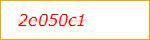

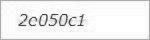

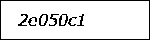

text ['', '2c050c1', '2c050c1', '2e050ct', '']


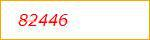

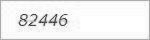

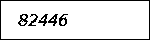

text ['', '82446', '82446', '82446', '']


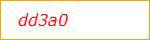

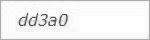

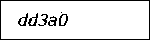

text ['', 'dd3a0', 'dd3a0', 'dd3a0', '']


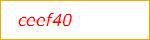

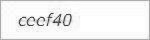

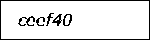

text ['', 'eeef40', 'ecer40', 'eeet40', '']


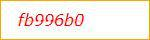

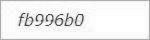

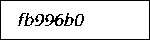

text ['', 'fb996b0', 'fb996b0', '#b996b0', '']


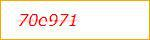

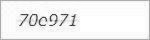

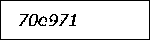

text ['', '‘700971', '700971', 'FOC974', '']


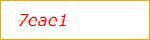

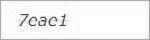

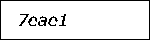

text ['', '7eacl', 'Zeacl', '7eael', '']


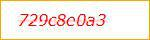

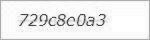

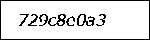

text ['', '729¢80083-', '729¢8e0a3', '72980083', '']


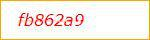

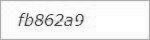

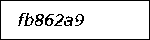

text ['', '£86289', 'fb862a9', 'fb862a9', '']


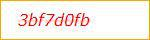

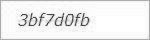

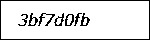

text ['', '3bf7d0fb', '3bf7d0fb', 'S3bf7d0fb', '']


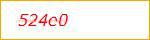

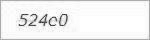

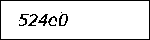

text ['', '52400', '524e0', '52400', '']


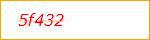

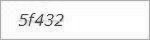

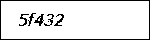

text ['', '5f432', '5f432', '5f432', '']


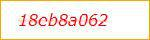

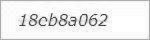

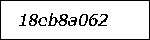

text ['', '18cb8a062', '18eb83062', '18eb8a062', '']


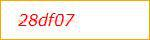

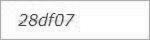

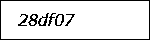

text ['', '28df07', '28df07', '28df07', '']


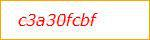

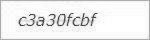

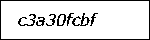

text ['', 'c3a30fcbf', '€3a30fcbf', '€3a30febF', '']


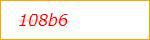

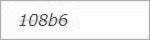

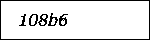

text ['', '108b6', '108b6', '108b6', '']


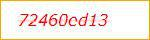

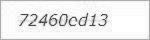

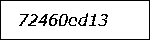

text ['', '724600d13', '724600d13', '724600d13', '']


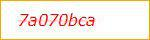

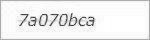

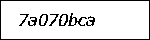

text ['', '7a070bca', '7a070bea', '7a070bca', '']


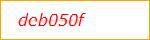

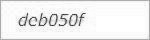

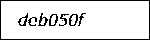

text ['', 'deb0SOF', 'debOsof', 'deb050f', '']


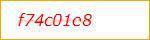

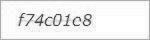

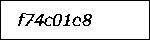

text ['', 'f74c0108', 'f74c01¢8', '£74c01¢8', '']


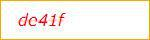

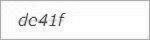

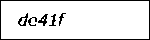

text ['', '', 'do4if', 'do4if', '']


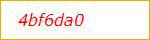

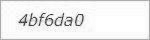

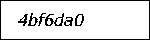

text ['', '4bféda0', '4bf6da0', '4bféda0', '']


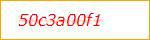

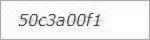

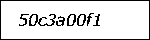

text ['', 'S50c3aQ0Ft', '50c3a00F1', '50c3a00F1', '']


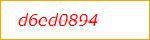

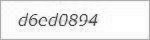

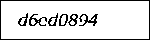

text ['', 'd6ed0894', 'd6ced0894', 'd6cd0894', '']


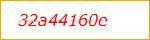

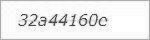

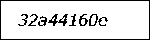

text ['', '328441600', '322441600', '328441600', '']


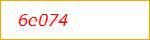

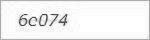

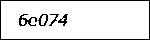

text ['', '6c074', '60074', '60074', '']


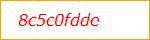

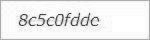

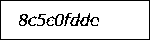

text ['', '‘8c5c0fdde', '8c5c0fdde', '8c5e0fdde', '']


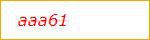

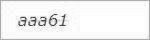

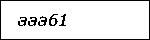

text ['', 'aaaél', 'aaa6l', 'aaa6t', '']


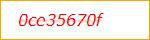

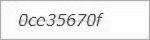

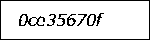

text ['', '0ce35670F', 'Oce35670F', '0c035670F', '']


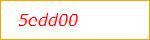

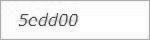

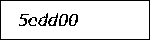

text ['', 'Sedd00', 'Sedd00', '5edd00', '']


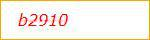

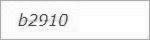

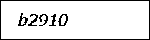

text ['', '62910', 'b2910', '62910', '']


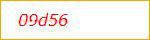

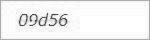

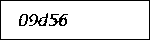

text ['', '', '09d56', '09456', '']


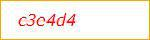

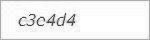

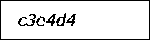

text ['', 'c3oad4', 'c304d4', 'c304d4', '']


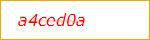

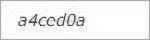

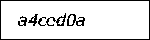

text ['', 'adced0a', 'a4ced0a', 'adecd0a', '']


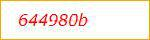

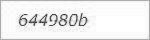

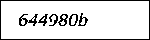

text ['', '644980b', '644980b', '644980b', '']


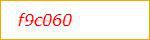

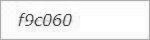

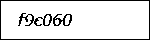

text ['', '', 'f9e060', '£9060', '']


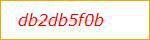

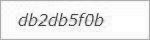

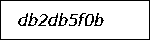

text ['', 'db2dbsfob', 'db2dbsf0b', 'db2db5f0b', '']


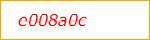

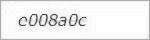

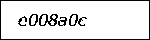

text ['', '', 'c008a0c', '00880.', '']


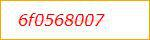

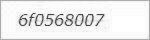

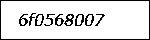

text ['', '6f0568007', '6f0568007', '6f0568007', '']


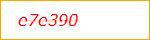

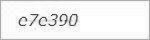

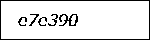

text ['', '70390', '70390', 'e7e390', '']


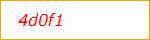

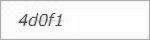

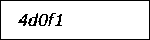

text ['', '‘4d0Ft', '4d0F1', '4d0F1', '']


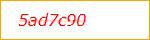

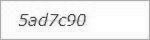

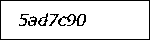

text ['', 'Sad7c90', '5ad7c90', '5ad7e90', '']


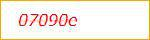

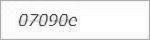

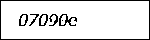

text ['', '070900', '070900', '070900', '']


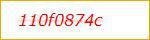

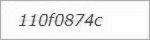

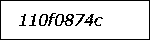

text ['', '110f0874e', '110f0874c', '110f0874¢', '']


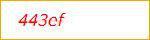

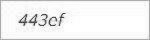

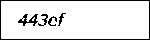

text ['', '443cf', '443cF', '4430f', '']


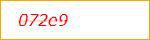

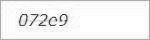

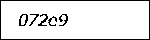

text ['', '07209', '07209', '07209', '']


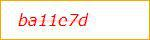

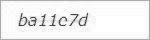

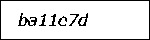

text ['', 'balie7d', 'bailie7d', 'baile7d', '']


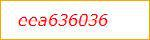

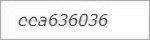

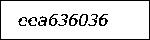

text ['', '€0a636036', '002636036', '€€8636036', '']


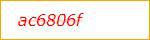

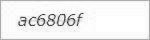

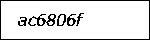

text ['', 'ac6s06F', 'ac6806f', 'ac6806F', '']


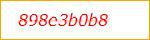

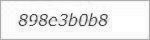

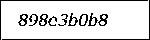

text ['', '89803b0b8', '', '', '']


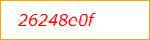

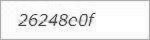

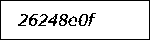

text ['', '26248c0f', '26248c0f', '26248¢e0F', '']


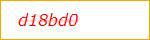

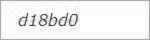

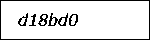

text ['', 'd18bd0', 'd18bd0', 'di8bd0', '']


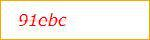

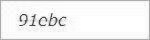

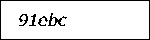

text ['', 'dtebe', '91ebe', '91ebe', '']


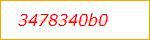

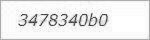

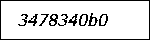

text ['', '3478340b0', '3478340b0', '3478340b0', '']


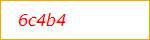

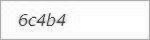

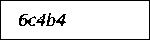

text ['', '', '6c4b4', '6c4b4', '']


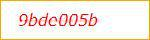

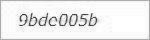

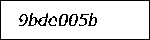

text ['', '9bde005b', '9bde005b', '9bde005b', '']


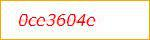

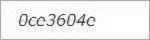

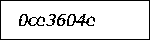

text ['', '0ce3604e', '0ce3604e', '00036040', '']


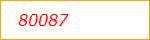

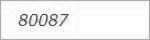

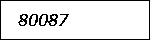

text ['', '80087', '80087', '80087', '']


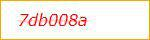

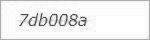

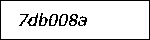

text ['', '7db008a', '7db008a', '7db008a', '']


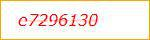

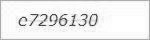

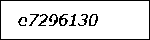

text ['', '7296130', '€7296130', '07296130', '']


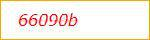

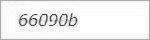

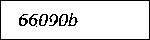

text ['', '', '66090b', '66090b', '']


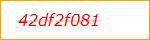

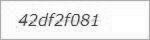

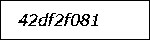

text ['', '42df2fos1', '42df2f0s1', '42df2f081', '']


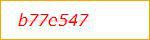

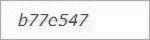

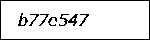

text ['', 'b770547', 'b770547', 'b770547', '']


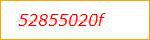

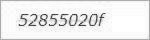

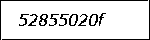

text ['', '52855020f', '', '', '']


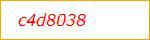

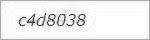

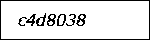

text ['', 'c4d8038', '€4d8038', '€4d8038', '']


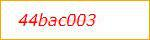

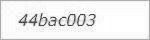

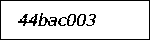

text ['', '44bac003', '44bac003', '44bac003', '']


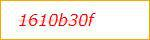

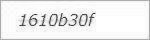

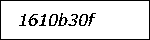

text ['', '/1610b30F', '1610b30F', '1610b30F', '']


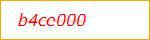

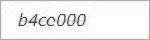

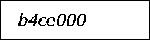

text ['', '', 'b4cc000', 'b4ec000', '']


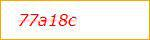

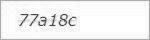

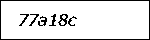

text ['', '77418', '77ai8e', '77atBe', '']


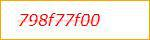

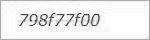

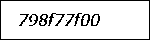

text ['', '798f77f00', '7987700', '79847700', '']


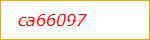

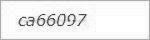

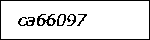

text ['', '€a66097', '6366097', '6366097', '']


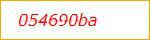

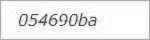

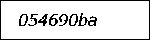

text ['', '054690ba', '054690ba', '054690ba', '']


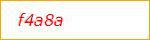

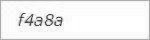

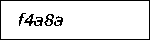

text ['', '4988', 'f4a8a', 'f4a8a', '']


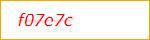

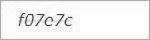

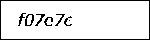

text ['', 'fo7e7e', 'f07e7¢€', 'f07e7€', '']


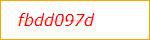

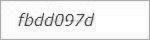

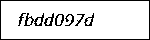

text ['', 'fbdd097d', 'fbdd097d', 'fbdd097d', '']


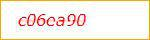

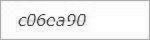

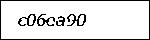

text ['', '06ea90', '06ea90', '6060890', '']


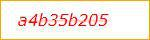

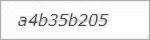

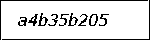

text ['', 'a4b35b205', '', '', '']


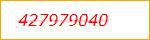

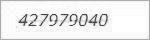

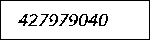

text ['', '427979040', '427979040', '427979040', '']


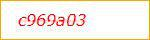

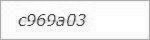

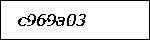

text ['', '969803', '€969803', '969303', '']


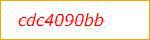

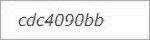

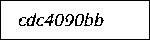

text ['', 'ede4090bb', 'ede4090bb', 'ede4090bb', '']


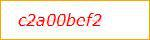

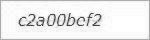

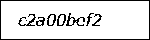

text ['', 'c2a00bof2', 'c2a00bef2', 'e2a00bof2', '']


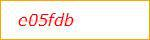

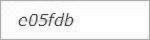

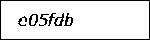

text ['', 'e05fdb', 'e05fdb', 'e05fdb', '']


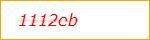

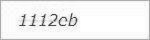

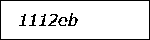

text ['', '1412eb', '1112¢eb', 'i1izeb', '']


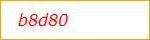

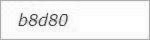

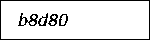

text ['', 'b8d80', 'b8d80', 'b8d80', '']


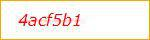

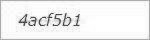

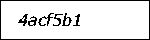

text ['', '', '4acf5b1', '4acf5bt', '']


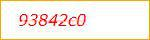

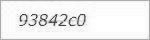

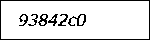

text ['', '93842c0', '9384200', '9384200', '']


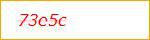

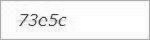

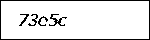

text ['', '7305¢', '7305¢', '7305', '']


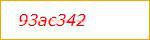

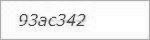

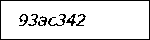

text ['', '93ac342', '93ac342', '93a€342', '']


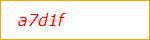

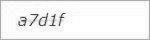

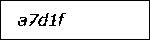

text ['', 'a7dif', 'a7dif', 'adit', '']


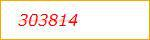

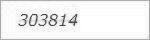

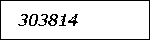

text ['', '(303814', '303814', '303814', '']


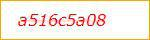

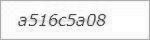

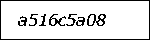

text ['', '2516c5a08', '@516c5a08', '@516¢5a08', '']


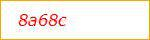

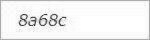

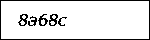

text ['', '', '8a68C', '8ab68C', '']


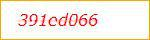

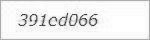

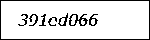

text ['', '3910066', '3910d066', '391cd066', '']


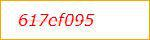

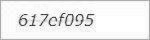

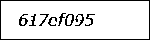

text ['', '617¢f095', '617¢cf095', '617¢ef095', '']


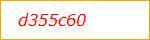

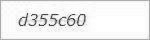

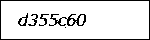

text ['', '355¢60', 'd355c60', 'd355¢60', '']


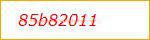

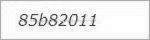

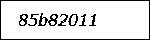

text ['', '85b82011', '85b82011', '85b82011', '']


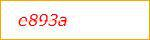

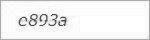

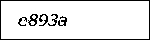

text ['', '8938', '08938', '©8938', '']


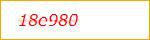

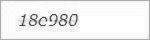

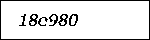

text ['', '180980', '18¢980', '18e980', '']


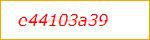

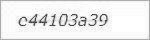

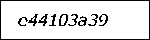

text ['', '044103439', '044103a39', '044103839', '']


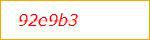

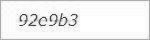

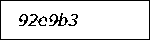

text ['', '920963', '92e9b3', '92¢9b3', '']


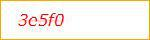

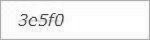

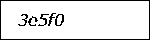

text ['', '3e5f0', '3e5f0', '30570', '']


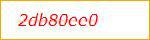

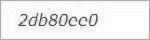

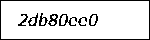

text ['', '2db80ec0', '2db80cc0', '2db80cc0', '']


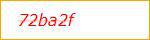

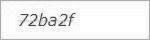

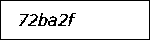

text ['', '72ba2t', '7aba2t', '72ba2~', '']


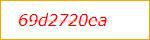

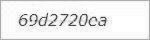

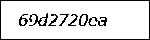

text ['', '69d2720ca', '69d2720ca', '69d2720ca', '']


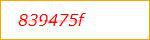

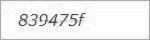

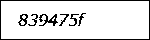

text ['', '839475F', '839475F', '839475F', '']


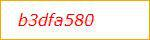

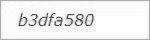

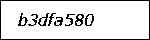

text ['', 'b3dfa580', 'b3dfa580', 'b3dfa580', '']


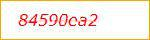

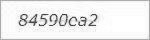

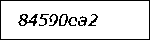

text ['', '84590082', '845900a2', '84590082', '']


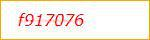

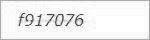

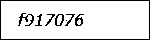

text ['', '#917076', '917076', 'f917076', '']


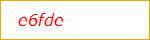

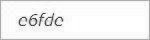

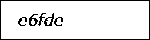

text ['', 'c6fde', 'e6fde', 'e6fde', '']


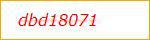

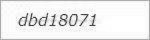

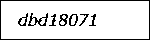

text ['', 'dbd18071', 'dbd18071', 'dbdi8071', '']


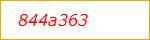

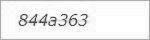

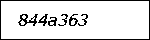

text ['', '8448363', '8442363', '8448362', '']


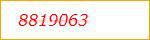

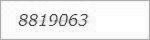

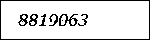

text ['', '8819063', '8819063', '8819062', '']


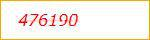

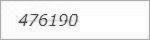

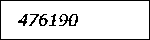

text ['', '476190', '476190', '476190', '']


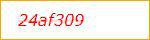

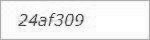

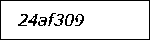

text ['', '24af309°', '24af309', '243309', '']


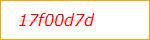

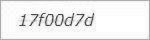

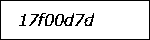

text ['', '17f00d7d', '17f00d7d', '4i7f00d7d', '']


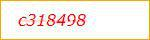

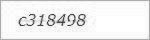

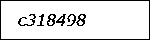

text ['', '318498', '318498', '€318498', '']


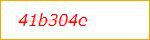

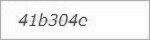

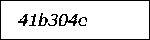

text ['', '41b3040', '41b304c', '41b3040', '']


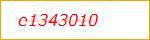

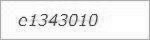

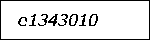

text ['', '01343010', '€1343010', '01343010', '']


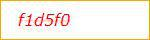

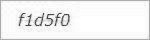

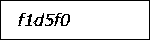

text ['', '', 'Fi1d5f0', 'f1d5f0', '']


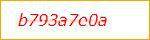

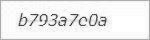

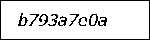

text ['', 'b793a7¢0a', 'b793a7¢0a', 'b793a7c0a', '']


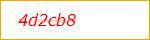

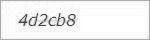

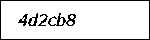

text ['', '4d2cb8', '4d2cb8', '4d2cb8', '']


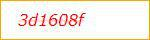

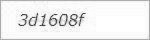

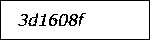

text ['', '3d1608F', '3d1608F', '3d1608F', '']


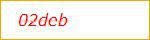

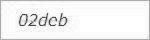

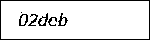

text ['', 'O2deb', 'O2deb', 'O2deb', '']


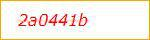

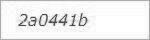

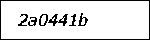

text ['', '2a0441b', '230441b', '230441b', '']


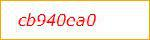

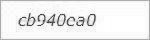

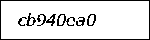

text ['', 'cb940ca0', 'b940ca0', 'eb940ca0', '']


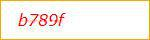

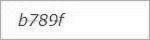

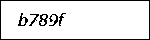

text ['', '‘b789f', 'b789of', 'b789F', '']


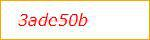

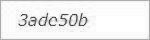

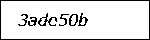

text ['', '3adeS0b', '3adeS0b', 'Jades0b', '']


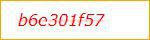

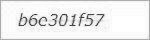

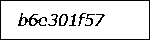

text ['', 'b60301f57', 'b60301f57', 'b60301f57', '']


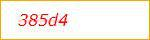

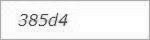

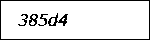

text ['', '(3854', '385d4', '38504', '']


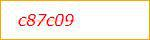

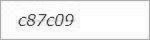

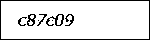

text ['', '8709', '87c09', '87609', '']


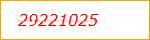

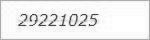

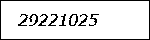

text ['', '29221025', '29221025', '29221025', '']


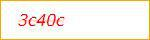

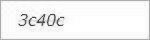

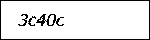

text ['', '3c40€', '3c40e', '36406', '']


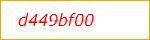

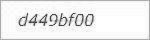

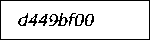

text ['', 'd449bf00', 'd449bf00', '449bf00', '']


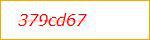

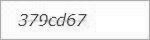

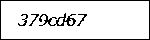

text ['', '379¢d67', '379¢d67', '379ed67', '']


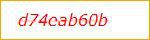

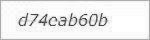

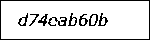

text ['', 'd74cab60b-', 'd74cab60b', 'd74c0ab60b', '']


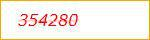

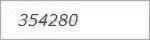

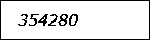

text ['', '354280', '354280', '354280', '']


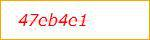

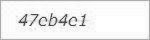

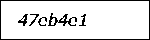

text ['', '47eb4e1', '47eb4e1', '47ceb4ei', '']


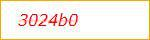

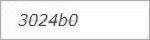

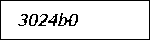

text ['', '3024b0', '3024b0', '3024b0', '']


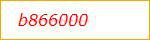

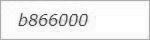

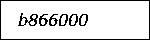

text ['', '866000', '6866000', '5866000', '']


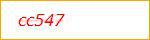

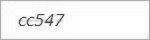

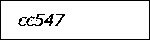

text ['', '', 'cc547', 'ec547', '']


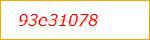

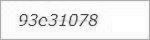

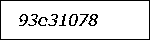

text ['', '93e31078', '93031078', '93031078', '']


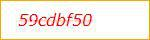

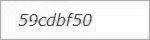

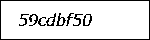

text ['', '59edbF50', '59edbf50', '58edbf50', '']


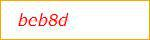

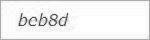

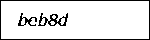

text ['', '', 'beb8d', 'beb8d', '']


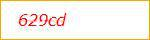

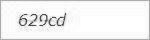

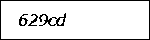

text ['', '629ed', '629ed', '629d', '']


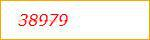

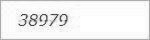

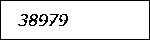

text ['', '38979,', '38979', '38979', '']


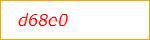

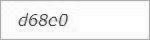

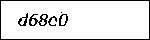

text ['', '', 'd68c0', '6800', '']


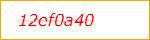

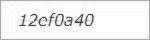

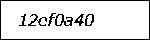

text ['', '12¢f0a40', '12¢ef0a40', '12¢f0a40', '']


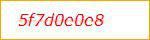

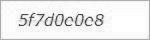

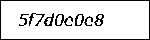

text ['', '5sf7d0c0c8', '5f7d0c0c8', '5f7d0e0e8', '']


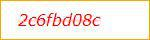

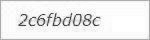

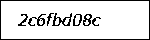

text ['', '2c6fbd08e', '2c6fbd08e', '2c6fbd08e', '']


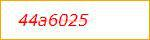

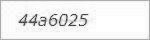

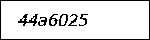

text ['', '4446025', '4426025', '4436025', '']


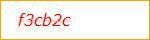

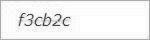

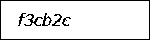

text ['', 'F3eb2e', 'F3cb2e', 'f3cb2e', '']


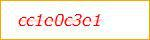

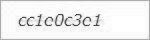

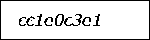

text ['', 'ecieOc3e1', 'eciedc3e1', 'celedc3ei', '']


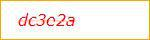

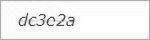

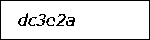

text ['', '', 'de3e2a', 'de3e2a', '']


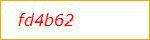

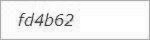

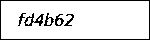

text ['', 'faab62', 'fd4b62', 'fd4ab62', '']


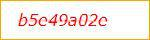

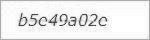

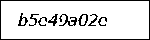

text ['', 'b5e49a020', 'b5e49a02e', 'b5c049a02c', '']


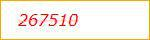

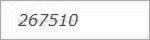

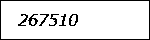

text ['', '', '267510', '267510', '']


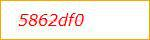

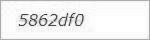

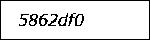

text ['', 's86zafo', '5862df0', '3862/0', '']


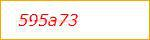

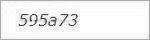

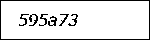

text ['', '595473', '595a73', '595a73', '']


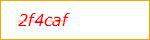

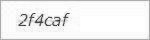

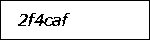

text ['', '2f4cat', '2f4caf', '2f4caf', '']


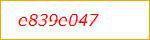

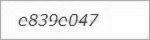

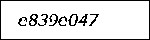

text ['', '08390047', '€839C047', '€839¢6047', '']


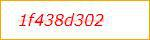

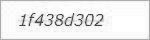

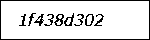

text ['', '1f438d302', '1f438d302', '1f438d302', '']


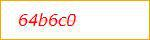

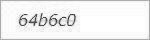

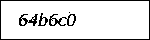

text ['', '', '64b6c0', '64b6c0', '']


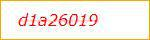

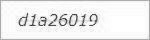

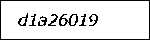

text ['', 'd1a26019', 'd1a26019', 'ia26019', '']


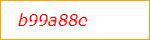

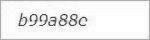

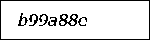

text ['', 'b99a88e', 'b99a88e', 'b99a88C', '']


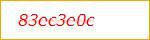

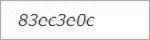

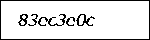

text ['', '830¢3C0C', '83ec3c0C', '83ec3c0e', '']


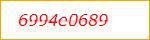

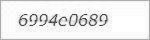

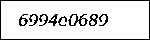

text ['', '6994c0689', '6994c0689', '699400689', '']


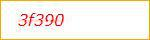

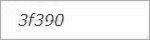

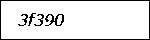

text ['', '3f390', '3f390', '3#390', '']


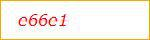

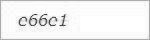

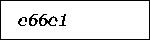

text ['', 'c66c1', 'c66ce1', 'e66e1', '']


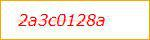

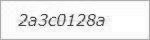

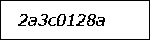

text ['', '2a3¢0128a', '2a3c0128a', '2a3c0128a', '']


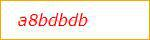

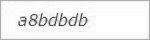

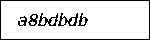

text ['', 'a8bdbdb', 'a8bdbdb', 'a8bdbdb', '']


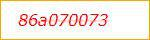

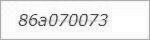

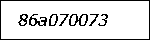

text ['', '863070073', '862070073', '868070073', '']


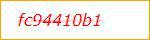

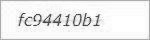

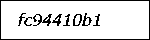

text ['', 'fc94410b1', '£c94410b1', '£c94410b1', '']


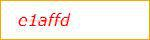

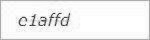

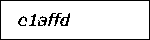

text ['', 'elaffd', 'elaffd', 'claffd', '']


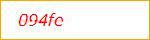

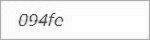

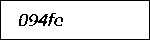

text ['', '094Fe', '094fe', '094fa', '']


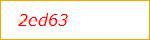

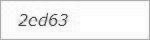

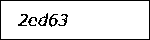

text ['', '2ed63', '20ed63', '2ed63', '']


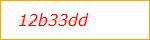

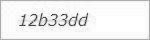

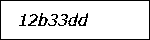

text ['', '12b33dd', '12b33dd', '412b33dd', '']


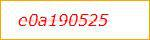

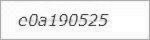

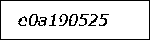

text ['', '08190525', '0a190525', '603190525', '']


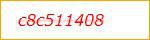

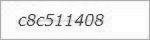

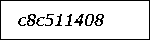

text ['', '8511408', '8c511408', '€8c511408', '']


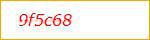

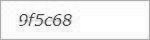

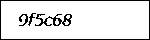

text ['', '', '9F5C68', '9F5C68', '']


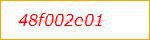

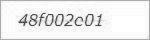

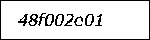

text ['', '48f002c01', '48f002c01', '487002001', '']


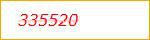

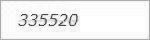

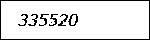

text ['', '335520', '335520', '335520', '']


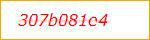

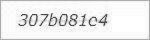

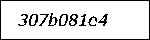

text ['', '307b08104', '307b08104', '307b08104', '']


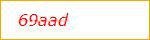

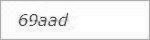

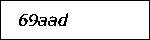

text ['', '69aad', '69aad', '69aad', '']


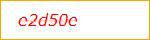

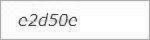

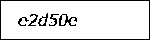

text ['', 'c2d50e', 'e2d50¢', 'e2d50e', '']


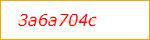

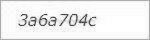

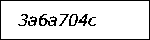

text ['', '3a6a704e', '3a6a704e', '3a6a704e', '']


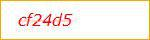

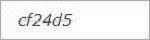

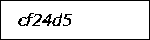

text ['', 'cf24d5', 'cf24d5', 'f24d5', '']


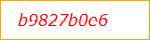

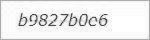

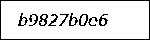

text ['', 'b9827b0c6', 'b9827b0c6', 'b9827b0c6', '']


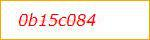

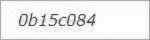

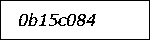

text ['', '', '0b15c084', '0b15c084', '']


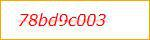

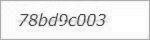

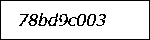

text ['', '78bd9c003', '78bd9c003', '78bd9¢003', '']


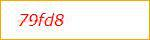

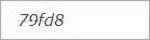

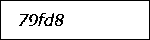

text ['', '79fd8', '79Fd8', 'POFAB', '']


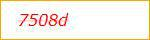

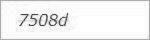

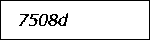

text ['', '', '7508d', '7508d', '']


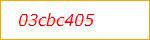

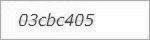

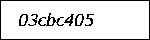

text ['', 'o3cbc405', 'O3cbc405', 'O3ebc405', '']


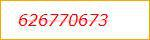

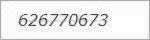

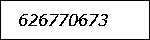

text ['', '626770673', '626770673', '626770673', '']


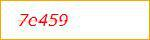

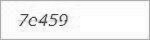

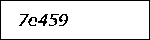

text ['', '', '70459', '70459', '']


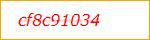

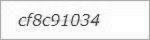

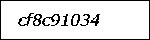

text ['', '891034', 'f8c91034', '891034', '']


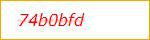

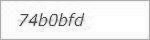

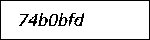

text ['', '74b0bFd', '74b0bfd', '74b0bfd', '']


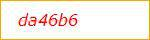

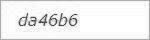

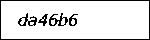

text ['', 'da46b6', 'da46b6', 'dad6b6', '']


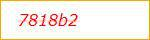

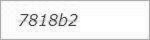

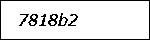

text ['', '7818b2', '7818b2', '7818b2', '']


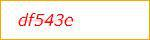

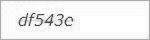

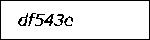

text ['', 'df543¢e', 'df543e', 'df5430', '']


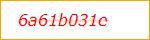

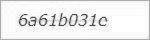

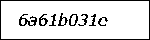

text ['', '6a61b031¢', '63a61b031¢e', '6a61b031e', '']


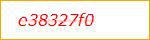

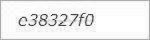

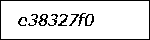

text ['', '03832710', '€38327f0', '03832710', '']


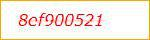

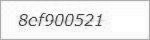

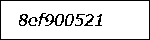

text ['', '8ef900521,', '8ef900521', '8ef900521', '']


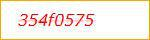

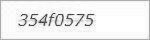

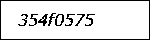

text ['', '354f0575', '354f0575', '354f0575', '']


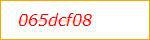

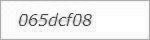

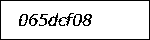

text ['', 'o6Sdcfo8', '065dcf08', '065df08', '']


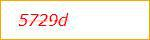

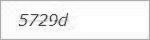

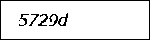

text ['', '', '5729d', '5729d', '']


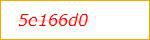

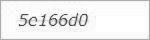

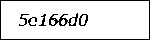

text ['', '5e166d0', '5e166d0', '5e166d0', '']


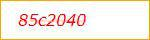

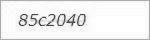

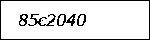

text ['', '85¢2040', '852040', '85€2040', '']


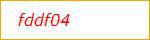

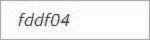

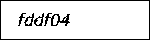

text ['', '', 'fddfo4', 'fddf04', '']


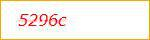

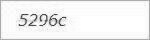

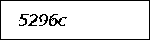

text ['', '5296¢', '5296', '5296', '']


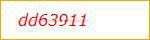

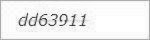

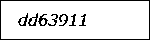

text ['', 'dd63911', 'dd63911', 'dd63914', '']


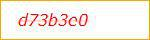

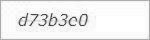

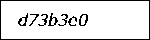

text ['', 'd73b3c0', 'd73b3c0', 'd73b3e0', '']


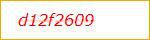

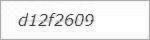

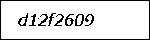

text ['', '4122609', '12/2609', '12#2609', '']


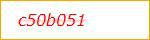

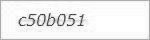

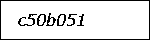

text ['', 'c50b051', 'c50b051', 'c50b051', '']


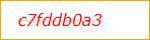

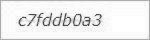

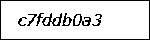

text ['', '7fddb0a3', 'e7fddb0a3', 'e7fddb0a3', '']


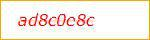

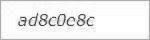

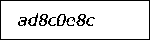

text ['', 'ad8c0e8e', 'ad8c0c8e', 'ad8c0e8c', '']


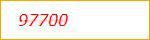

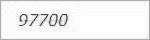

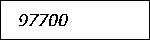

text ['', '97700', '97700', '97700', '']


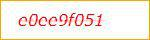

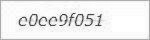

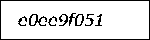

text ['', 'e0ce9f051°', 'e0ce9f051', 'edce9f051', '']


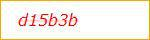

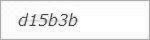

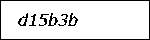

text ['', '‘di5b3b', 'd15b3b', 'd15b3b', '']


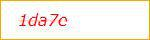

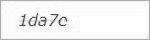

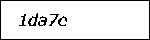

text ['', 'ida7e', 'ida7e', 'ida7e', '']


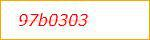

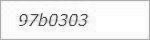

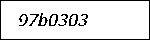

text ['', '97b0303', '97b0303', '97b0303', '']


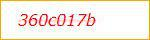

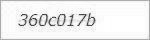

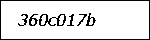

text ['', '360c017b', '360¢017b', '360c017b', '']


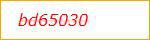

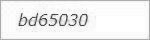

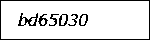

text ['', 'bd65030', 'bd65030', 'bd65030', '']


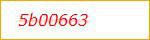

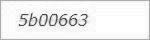

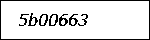

text ['', '5b00663', '5b00663', '5b00663', '']


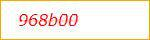

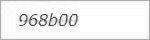

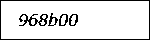

text ['', '968b00', '968b00', '968b00', '']


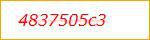

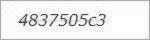

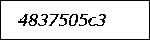

text ['', '4837505¢c3', '4837505¢3', '4837505¢3', '']


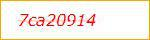

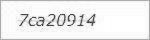

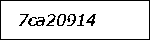

text ['', '', '7ca20914', '7ea20914', '']


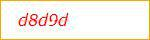

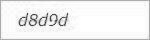

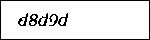

text ['', 'a8d9d', 'd8d9d', 'd8d9d', '']


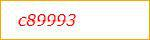

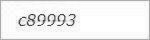

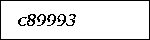

text ['', '89993', '89993', '89993', '']


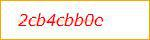

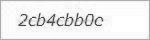

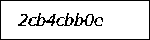

text ['', '2cb4cbb0e', '2cb4cbb0e', '2cb4cbhb0e', '']


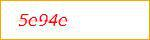

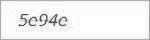

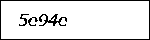

text ['', '', '5e94e', '5e94e', '']


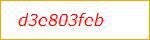

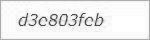

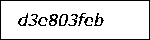

text ['', 'd3c803feb', 'd30803feb', 'd3c803feb', '']


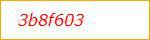

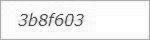

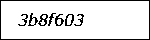

text ['', '3b8f603', '3b8f603', '3b8f603', '']


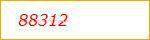

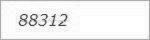

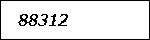

text ['', '88312', '88312', '88312', '']


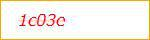

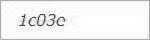

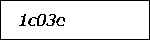

text ['', '1603¢', '1c03e', 'ic03e', '']


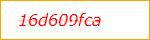

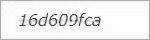

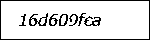

text ['', '', '16d609fca', '16d609fea', '']


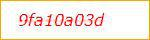

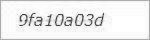

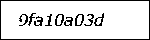

text ['', '9fa10a03d', '9fa10a03d', '9fai0a03d', '']


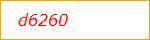

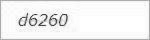

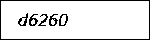

text ['', '46260', '6260', '6260', '']


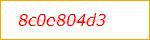

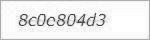

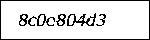

text ['', '‘8c00804d3', '8c0c804d3', '8c00804d3', '']


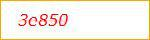

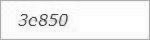

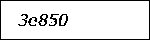

text ['', '3e850', '3e850', '3e850', '']


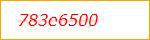

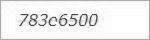

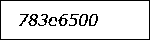

text ['', '783€6500', '78306500', '78306500', '']


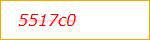

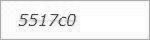

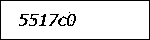

text ['', '5517¢0', '5517c0', '5517e0', '']


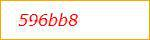

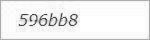

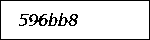

text ['', '596bb8', '596bb8', '596bb8', '']


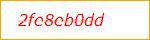

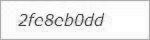

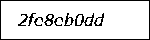

text ['', '2fe8eb0dd', '2fe8eb0dd', 'fe8eb0dd', '']


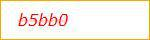

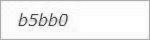

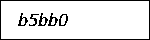

text ['', 'b5bbO', 'b5bb0', 'b5bb0', '']


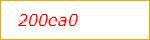

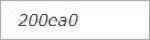

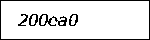

text ['', '200¢a0', '200ca0', '200680', '']


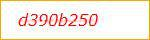

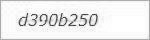

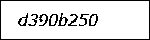

text ['', 'd390b250', '390b250', '390b250', '']


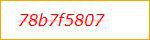

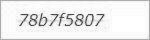

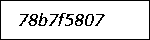

text ['', '78b7f5807', '78b7f5807', '78b745807', '']


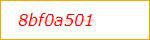

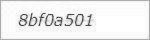

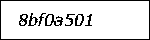

text ['', '8bfoa501', '8bf0a501', '8bf0a501', '']


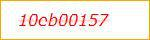

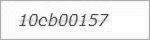

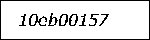

text ['', '10¢b00157', '10eb00157', '10eb00157', '']


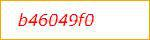

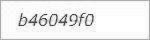

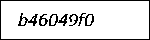

text ['', '', 'b46049f0', 'b46049f0', '']


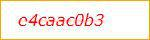

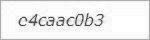

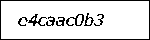

text ['', '', 'c4caac0b3', 'e4caac0b?', '']


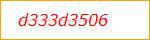

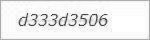

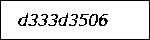

text ['', '33343506', 'd333d3506', '33343506', '']


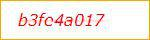

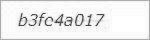

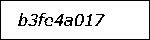

text ['', 'b3fe4a017', 'b3f04a017', 'b3fe4a017', '']


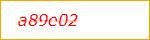

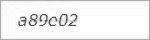

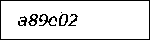

text ['', '389002', '289C02', '389002', '']


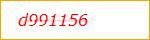

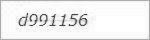

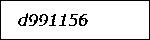

text ['', '991156', 'd991156', '991156', '']


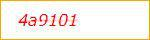

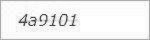

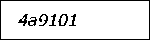

text ['', '449101', '429101', 'Fa9t0t', '']


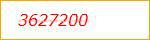

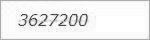

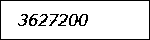

text ['', '3627200', '3627200', '3627200', '']


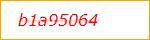

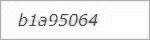

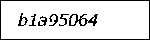

text ['', '51895064', 'b1a95064', 'b1a95064', '']


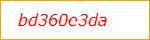

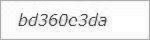

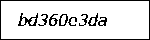

text ['', 'bd36003da', 'bd360e3da', 'bd36003da', '']


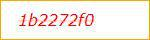

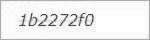

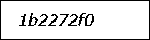

text ['', '1b2272f0', '1b2272f0', '1b2272f0', '']


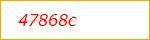

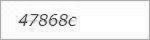

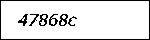

text ['', '47868C', '47868c', '478686', '']


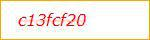

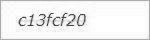

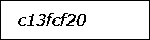

text ['', '‘c13fcf20', '13fcf20', 'ci3fef20', '']


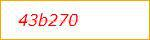

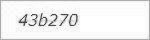

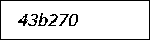

text ['', '43b270', '43b270', '43b270', '']


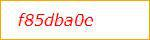

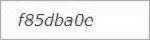

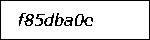

text ['', 'f85dba0e', 'f85dba0e', 'f85dba0e', '']


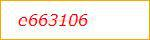

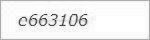

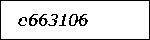

text ['', '0663106', '0663106', '0663106', '']


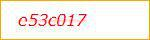

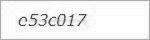

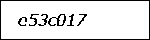

text ['', 'e53¢017', 'e53c017', 'e53c017', '']


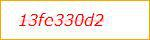

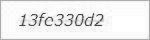

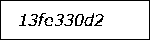

text ['', '13fe330d2', '13fe330d2', '13fe330d2', '']


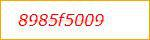

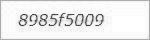

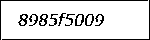

text ['', '89855009', '', '', '']


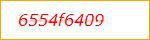

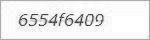

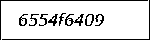

text ['', '65546409', '', '', '']


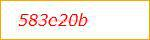

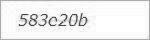

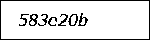

text ['', '583¢20b', '583e20b', '383e20b', '']


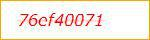

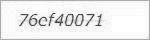

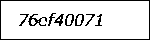

text ['', '76cf40071', '76cf40071', '76cf40071', '']


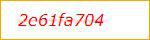

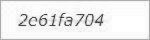

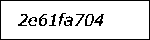

text ['', '2061fa704', '20c61fa704', '206 1fa704', '']


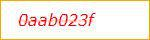

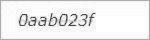

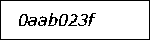

text ['', 'Oaab023f', 'Oaab023F', 'Oaab023', '']


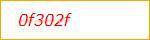

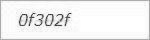

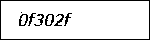

text ['', 'of302F', 'Of302F', 'OF302F', '']


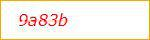

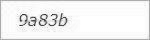

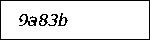

text ['', '', '9a83b', '9883b', '']


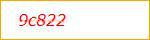

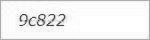

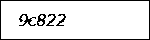

text ['', '9¢822', '9822', '9822', '']


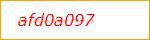

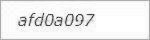

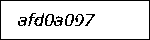

text ['', 'afd0a097', 'afd0a097', 'afd03a097', '']


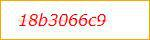

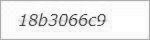

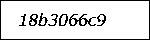

text ['', '18b3066¢9', '18b3066c9', '18630669', '']


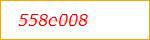

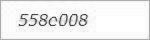

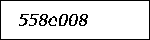

text ['', '558008', '558e008', '5580008', '']


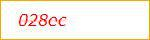

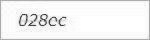

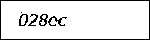

text ['', '028e¢', '028ec', '028ec', '']


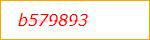

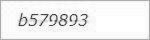

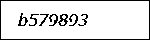

text ['', '579893', '6579893', '5579893', '']


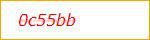

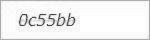

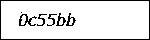

text ['', 'Oc55bb', 'Oc5Sbb', 'Oc55bb', '']


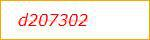

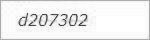

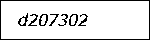

text ['', '4207302', '207302', '207302', '']


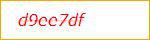

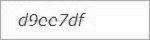

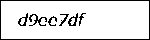

text ['', 'd9ce7dF', 'd9ee7dF', 'd9ea7df', '']


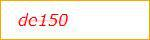

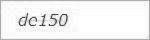

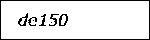

text ['', 'do150', 'de150', 'dei50', '']


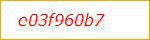

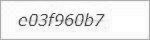

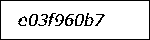

text ['', '©03f960b7', 'C03f960b7', 'eO3f960B7', '']


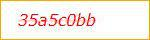

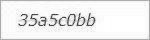

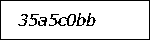

text ['', '35a5c0bb', '35a5cObb', '35a5c0bb', '']


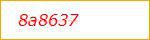

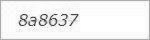

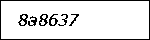

text ['', '838637', '838637', '838637', '']


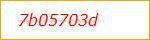

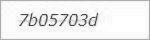

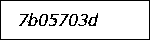

text ['', '7b05703d', '7b05703d', '7b03703d', '']


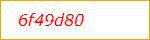

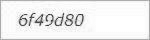

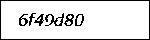

text ['', '6f49d80', '6f49d80', '6f49d80', '']


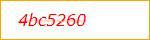

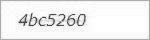

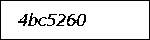

text ['', '4bc5260', '4bc5260', '4bc5260', '']


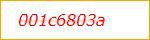

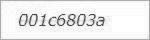

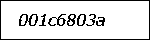

text ['', '001¢6803a', '001c6803a', '0010680348', '']


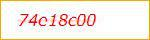

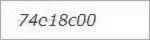

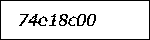

text ['', '74018c00', '7401800', '74048600', '']


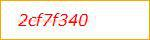

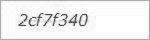

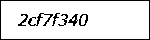

text ['', '2cf7f340', '2cf7~340', '2cf76340', '']


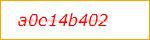

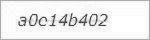

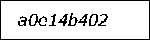

text ['', 'a0014b402', '300146402', 'a0e14b402', '']


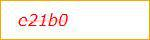

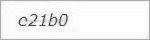

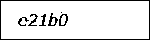

text ['', '¢21b0', '¢21b0', 'e21b0', '']


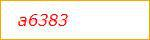

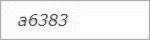

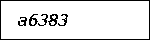

text ['', '86383', '86383', '386383', '']


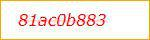

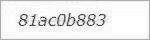

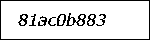

text ['', '81ac0b883', '81acOb883', '8iacOb883', '']


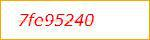

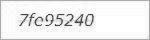

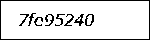

text ['', '7f095240', '7fe95240', '7fe95240', '']


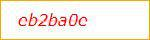

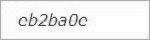

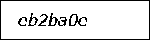

text ['', 'eb2ba0e', 'eb2ba0e', 'eb2bate', '']


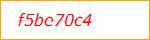

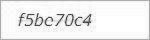

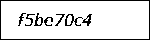

text ['', 'f5be70c4', 'f5be70c4', 'f5be70c4', '']


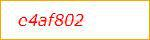

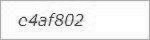

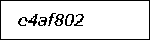

text ['', 'e4af802', 'c4af802', 'e4af802', '']


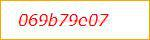

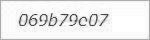

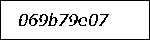

text ['', '06967907', '069b79¢c07', '069b79¢07', '']


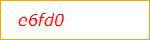

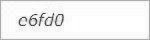

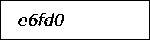

text ['', 'c6fdo', 'e6fdo', 'e6fd0', '']


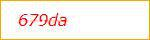

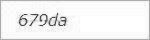

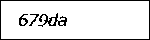

text ['', '679da', '679da', '679da', '']


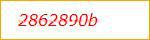

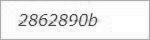

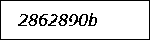

text ['', '2862890b', '2862890b', '2862890b', '']


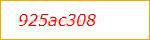

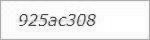

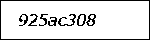

text ['', '925ac308', '925ac308', '925ac308', '']


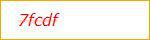

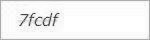

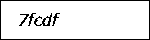

text ['', '7tedf', '7fedf', 'Pfedf', '']


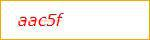

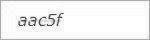

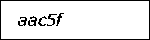

text ['', 'aacst', 'aacst', 'aacst', '']


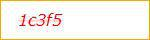

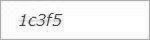

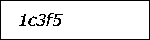

text ['', '1¢63f5', '16375', '163f5', '']


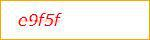

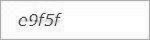

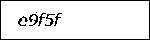

text ['', 'Ors', 'eOfst', 'eofef', '']


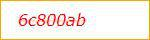

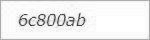

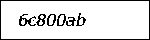

text ['', '6c800ab', '6c800ab', '6e800ab', '']


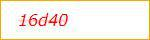

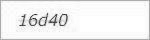

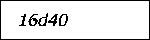

text ['', '16440', '16d40', '16d40', '']


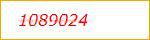

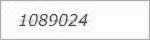

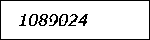

text ['', '1089024', '1089024', '1089024', '']


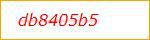

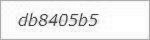

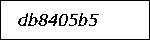

text ['', 'db8405b5', 'db8405b5', 'db8405b5', '']


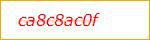

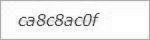

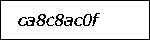

text ['', 'ea8c8ac0f', 'ca8c8acdf', 'ca8c8ac0f', '']


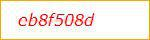

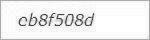

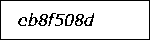

text ['', 'eb8f508d', 'eb8f508d', 'eb8f508d', '']


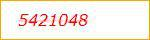

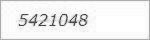

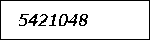

text ['', '5421048', '5421048', '5421048', '']


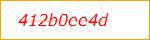

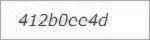

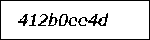

text ['', '412b00ce4d', '412b0cce4d', '412b0c04d', '']


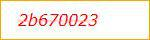

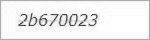

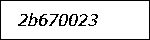

text ['', '2670023', '2b670023', '2b670023', '']


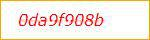

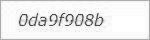

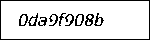

text ['', 'Oda9f908b', 'Oda9f908b', 'Oda 9f908b', '']


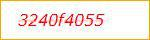

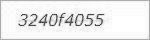

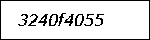

text ['', '3240F4055', '3240f4055', '3240f4055', '']


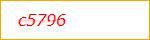

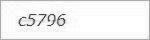

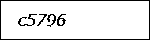

text ['', '5796', '5796', '5796', '']


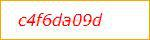

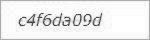

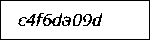

text ['', 'c4feda0od', 'c4f6da09d', 'e4f6oda09d', '']


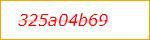

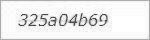

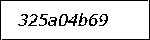

text ['', '325a04b69', '', '', '']


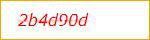

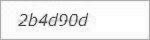

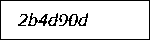

text ['', '2b4d90d', '2b4d90d', '2b4d90d', '']


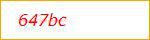

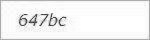

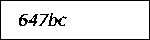

text ['', '647be', '647be', '647be', '']


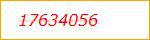

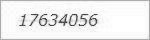

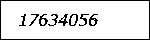

text ['', '17634056', '17634056', '17634056', '']


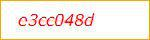

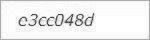

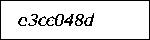

text ['', 'e3cc048d', 'e3cc048d', 'e3ce048d', '']


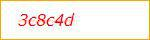

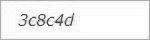

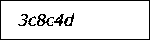

text ['', '3c8e4d', '3c8c4d', '38c4d', '']


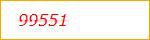

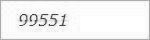

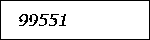

text ['', '99551', '99551', '99551', '']


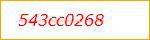

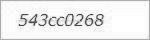

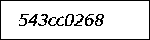

text ['', '543¢c0268', '5436c0268', '543cc0268', '']


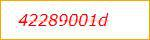

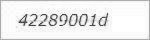

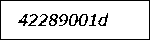

text ['', '42289001d', '42289001d', '422890014', '']


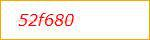

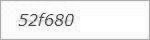

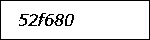

text ['', '52f680', '52680', '52680', '']


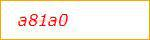

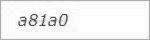

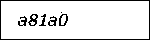

text ['', 'a81a0', 'a81a0', 'a8tad', '']


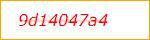

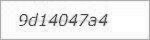

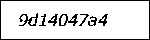

text ['', '91404784', '9d14047a4', '941404784', '']


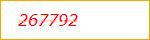

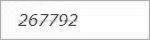

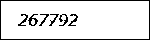

text ['', '267792', '267792', '267792', '']


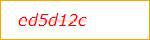

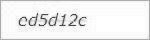

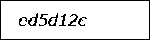

text ['', 'ed5d12¢', 'edSd1i2e', 'ed5di2e', '']


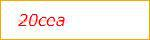

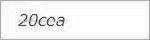

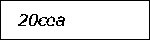

text ['', '', '20cea', '20c0a', '']


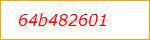

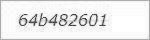

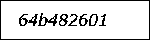

text ['', '64b482601', '64b482601', '64b482601', '']


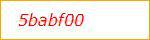

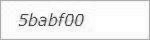

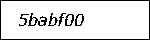

text ['', 'Sbabf00', 'Sbabfoo', 'Sbabfo0', '']


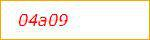

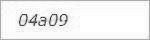

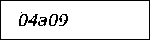

text ['', '04309', '04a09', '04309', '']


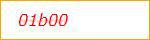

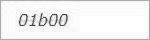

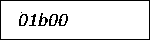

text ['', '01b00', '01b00', '01b00', '']


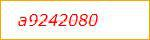

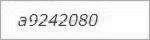

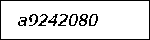

text ['', '29242080', '29242080', '29242080', '']


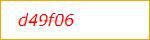

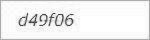

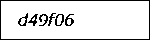

text ['', 'd49f06', '4906', '4906', '']


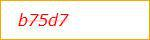

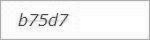

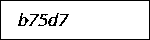

text ['', '', 'b75d7', 'b75d7', '']


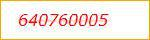

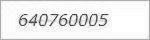

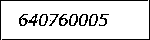

text ['', '640760005', '', '', '']


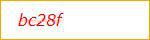

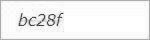

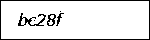

text ['', 'be28t', 'beast', 'be28f', '']


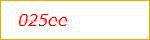

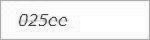

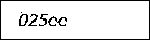

text ['', '025¢0', '025ee', '025¢e0', '']


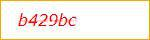

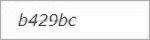

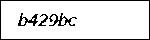

text ['', 'b429be', 'b429be', 'b429bC', '']


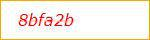

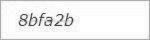

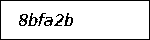

text ['', '8bfa2b', '8bfa2b', '8bfa2b', '']


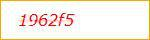

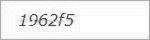

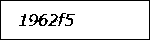

text ['', '1962f5', '1962f5', '1962f5', '']


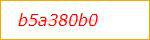

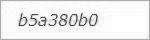

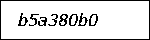

text ['', 'b5a380b0', 'b5a380b0', 'b5a380b0', '']


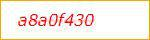

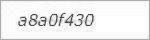

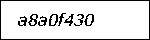

text ['', '28a0F430', '28a0F430', 'a8a0l430', '']


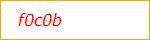

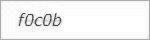

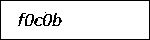

text ['', 'fOcOb', 'f0cOb', 'f0c0b', '']


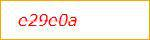

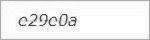

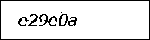

text ['', 'e2900a', '29e0a', 'e29e0a', '']


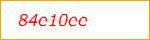

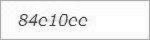

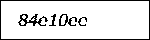

text ['', '84e10ec', '84e10ce', '84et0ec', '']


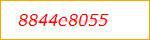

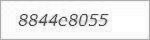

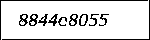

text ['', '884408055,', '', '', '']


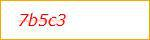

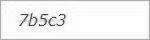

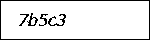

text ['', '7b5e3', '7b5c3', '7b5C3', '']


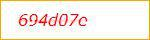

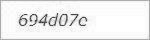

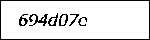

text ['', '694d07¢', '694d07¢', '694d070', '']


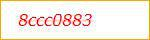

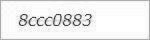

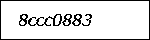

text ['', '‘8ccc0883', '8ccc0883', '8ece0883', '']


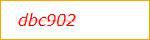

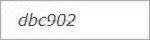

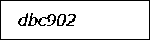

text ['', 'dbc902', 'dbc902', 'dbc902', '']


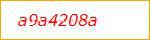

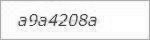

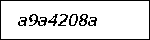

text ['', '3924208a', '29242088', '29942088', '']


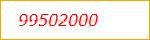

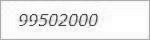

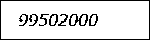

text ['', '99502000', '99502000', '99502000', '']


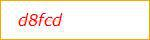

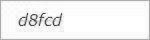

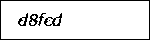

text ['', 'd8fed', 'd8fed', 'd8fed', '']


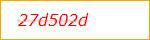

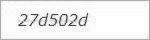

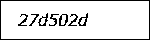

text ['', '27d502d', '27d502d', '27¢502d', '']


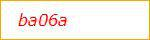

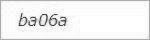

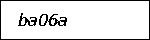

text ['', 'ba06a', 'ba06a', 'ba06a', '']


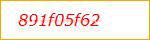

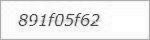

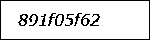

text ['', '891f05f62', '891f05f62', '891f05f62', '']


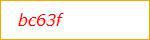

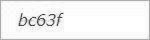

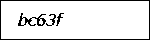

text ['', 'be63f', 'be63F', 'be63F', '']


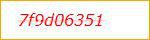

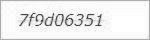

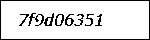

text ['', '7I9d06351°', '7F9d06351', '7f9d06351', '']


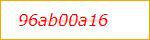

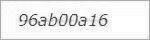

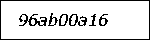

text ['', '96ab00a16', '96ab00a16', '96ab00816', '']


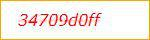

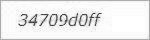

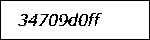

text ['', '34709d0fF', '34709d0fF', '347000 0fF', '']


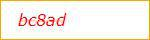

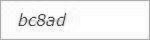

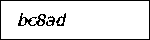

text ['', 'bc8ad', 'be8ad', 'be8ad', '']


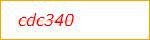

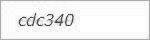

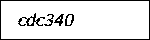

text ['', '', 'edc340', 'ede340', '']


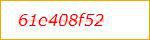

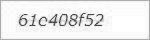

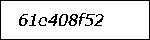

text ['', '610408f52', '610408f52', '61040852', '']


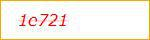

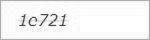

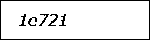

text ['', '10721', '1e721', 'te72i', '']


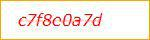

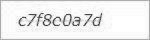

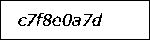

text ['', '€7f80087d', 'c7f800a7d', 'e7f8e0a7d', '']


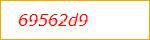

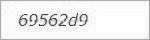

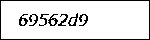

text ['', '69562d9', '69562d9', '6956249', '']


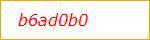

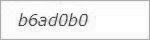

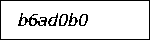

text ['', 'b6ad0b0', 'b6ad0bO', 'b6ad0b0', '']


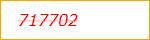

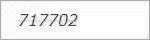

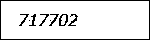

text ['', '‘717702', '717702', '717702', '']


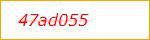

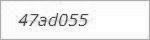

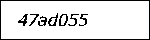

text ['', '47ad055', '47ad055', '47ad055', '']


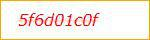

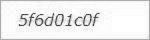

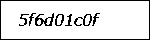

text ['', '5f6d01cOF', '5f6d01cOf', '5f6d01c0F', '']


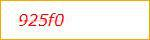

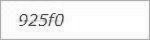

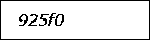

text ['', '925f0', '925f0', '92510', '']


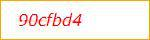

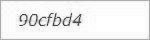

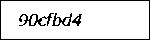

text ['', '', '90cfbd4', 'Oefbdd', '']


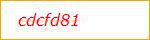

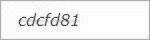

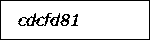

text ['', 'edefd81', 'edefd81', 'edefd81', '']


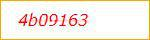

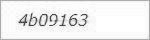

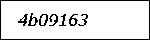

text ['', '4b09163', '4b09163', '4b09163', '']


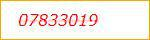

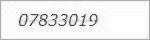

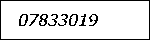

text ['', '07833019', '07833019', '07833019', '']


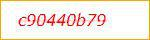

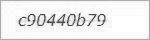

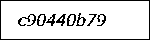

text ['', '€90440b79', '90440679', '©90440B79', '']


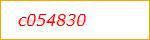

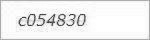

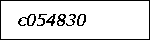

text ['', '€054830', '054830', '€054830', '']


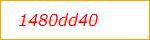

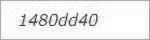

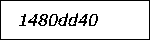

text ['', '1480dd40', '1480dd40', '1480dd40', '']


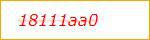

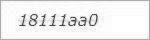

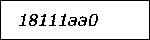

text ['', '18111980', '18itiaad', '18iitaad', '']


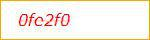

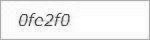

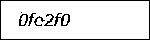

text ['', 'Ofe2f0', 'Ofe2fO', 'Ofe2f0', '']


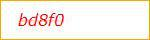

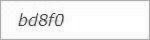

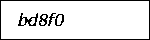

text ['', 'basfo', 'bd8f0', 'bd8f0', '']


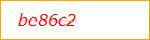

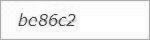

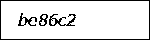

text ['', '', 'bes6c2', 'besb6e2', '']


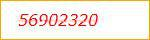

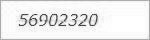

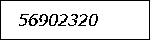

text ['', '56902320', '56902320', '56902320', '']


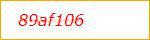

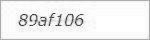

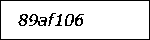

text ['', '898106', '89af106', '89af106', '']


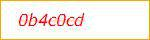

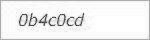

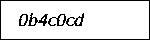

text ['', '', 'Ob4c0ed', 'Ob4c0ed', '']


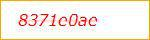

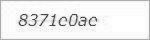

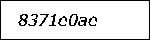

text ['', '8371c0ae', '8371c0ac', '8371e0ac', '']


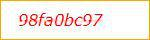

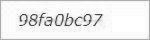

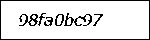

text ['', '98fa0bc97', '98fa0bc97', '98fa0bcO7', '']


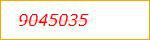

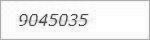

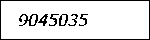

text ['', '9045035', '9045035', '9045035', '']


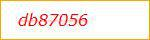

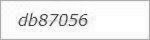

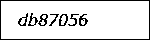

text ['', 'db87056', 'db87056', 'b87056', '']


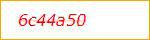

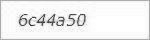

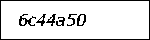

text ['', '6c44a50', '6c44a50', '6¢44a50', '']


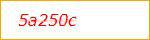

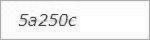

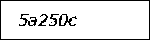

text ['', '5a250e', '5a250e', 'S5a250€', '']


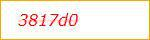

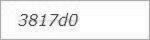

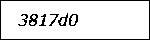

text ['', '381740', '3817d0', '381740', '']


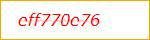

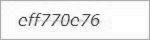

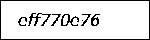

text ['', 'cff770076', 'cff770076', 'ff770076', '']


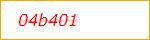

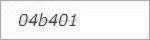

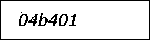

text ['', 'o4b401', '04b401', '04401', '']


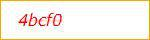

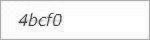

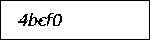

text ['', '4bcfO', '4bcf0', '4bef0', '']


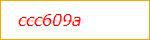

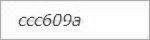

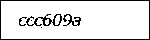

text ['', 'ecc609a', 'ecc609a', 'céc6098', '']


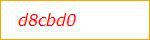

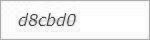

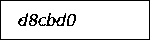

text ['', 'd8cbd0', 'd8cbd0', 'd8cbd0', '']


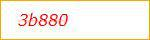

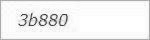

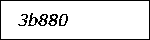

text ['', '36880', '3b880', '3b880', '']


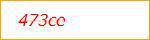

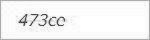

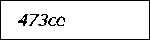

text ['', '‘47300,', '47300', '47300', '']


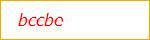

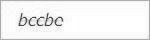

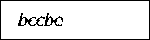

text ['', '', '', '', '']


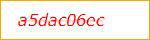

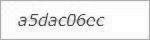

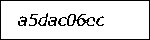

text ['', 'aSdac06ec', 'aSdac06ec', 'aSdac06ec', '']


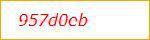

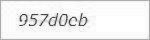

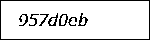

text ['', '957d0eb', '957d00eb', '957d0eb', '']


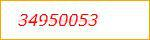

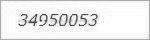

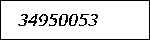

text ['', '34950053', '34950053', '34950053', '']


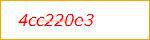

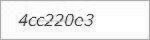

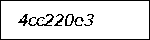

text ['', '4cc22003', '4cc22003', '40622003', '']


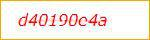

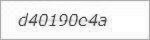

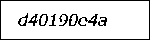

text ['', '40190043', '40190042', '40190044', '']


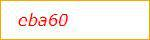

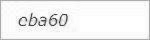

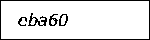

text ['', 'eba60', 'eba60', 'ebab0', '']


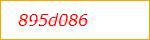

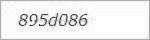

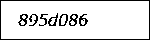

text ['', '8954086', '895d086', '895d086', '']


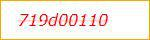

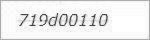

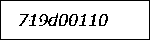

text ['', '(719d00110', '719d00110', '719d00110', '']


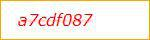

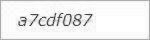

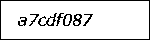

text ['', 'a7edf087', 'a7cdf087', 'a7cdfO87', '']


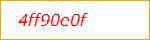

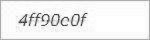

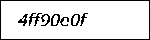

text ['', '4ff90c0f', '4ff90c0F', '4#f9000F', '']


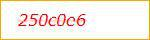

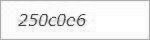

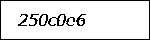

text ['', '250c006 |', '250c0c6', '25006', '']


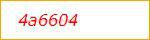

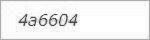

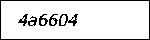

text ['', '426604', '426604', '436604', '']


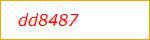

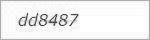

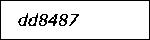

text ['', 'dd8487', 'dd8487', 'dd8487', '']


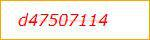

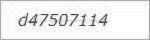

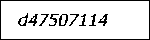

text ['', '47507114', '47507114', '47507114', '']


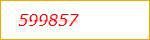

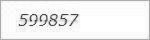

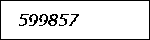

text ['', '599857', '599857', '599857', '']


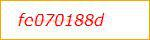

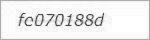

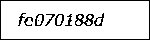

text ['', 'fc070188d', 'fc070188d', 'fe070188d', '']


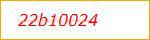

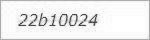

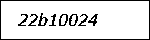

text ['', '22610024', '22610024', '22610024', '']


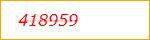

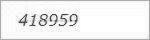

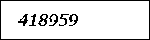

text ['', '418959', '418959', '418959', '']


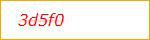

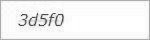

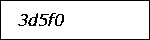

text ['', '3d5f0', '3d5f0', '3d 570', '']


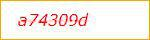

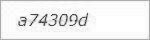

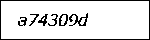

text ['', '874309d', '374309d', '3743090', '']


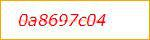

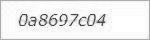

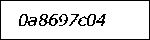

text ['', '08697c04', '0a8697c04', '0288697604', '']


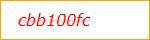

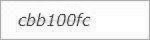

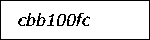

text ['', 'cbb100fc', 'ebb100fe', 'ebbidofe', '']


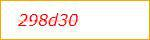

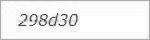

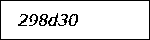

text ['', '298430', '298d30', '298430', '']


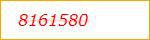

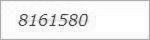

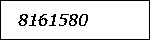

text ['', '8161580', '8161580', '8161580', '']


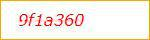

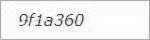

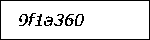

text ['', '9f1a360', '9f1a360', '9F4a360', '']


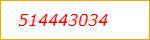

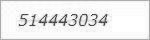

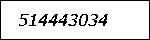

text ['', '514443034', '514443034', '514443034', '']


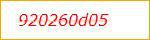

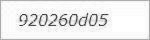

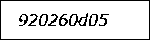

text ['', '920260405', '920260405', '920260405,', '']


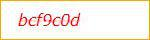

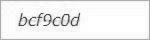

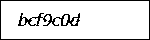

text ['', '', '', '', '']


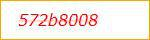

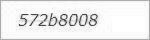

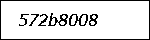

text ['', '572b8008', '572b8008', '572b8008', '']


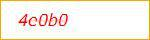

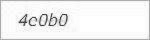

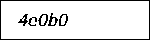

text ['', '', '4c0b0', '4e0b0', '']


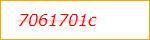

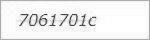

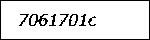

text ['', '‘7061701¢', '7061701¢', 'PO6L7OLE', '']


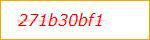

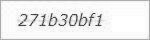

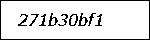

text ['', '271b30bf1', '271b30bf1', '271b30bf1', '']


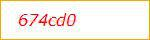

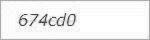

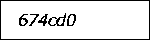

text ['', '674cd0', '674cd0', '674ced0', '']


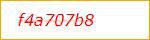

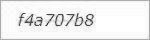

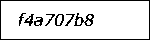

text ['', '(f4a707b8', '£4a707b8', 'f4a707b8', '']


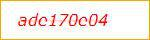

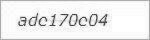

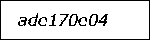

text ['', 'ade170c04', 'ade170c04', 'ade170c04', '']


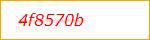

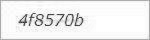

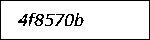

text ['', '4f8570b', '4f8570b', '4#8570b', '']


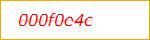

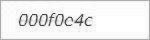

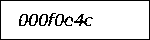

text ['', 'o00f0e4c', 'o00f0e4e', '000f004c', '']


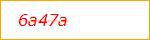

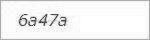

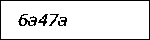

text ['', '63478', '62478', '6ad7a', '']


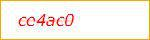

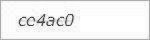

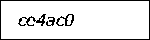

text ['', '', 'co4ac0', 'codacd', '']


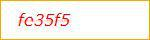

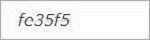

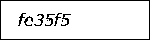

text ['', 'Fe3565', 'fe35t5', 'fe35f5', '']


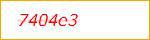

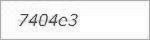

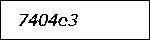

text ['', '740403', '740403', '740403', '']


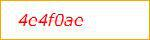

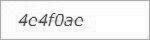

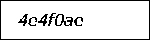

text ['', '', '4c4f0ac', '4c04f0ac', '']


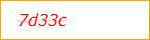

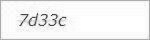

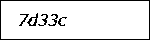

text ['', '7d33¢', '7d33€', '7d33¢', '']


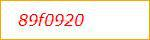

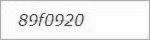

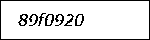

text ['', '89f0920', '89f0920', '89f0920', '']


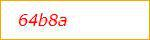

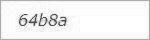

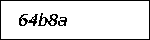

text ['', '', '64b8a', '64b8a', '']


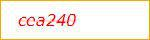

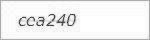

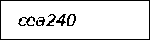

text ['', 'eca240', 'ca240', 'c0a24)', '']


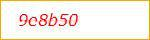

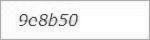

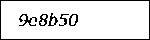

KeyboardInterrupt: ignored

In [0]:
i=0
for f in os.listdir('/content/captchas-jpg'):
  i+=1
  deco('/content/captchas-jpg/' + f)

In [0]:
"""

def clear_captchas(file_name, i):
  
  display(pyimg(file_name))
  
  img = cv2.imread(file_name)
  img = cv2.resize(img,(450,80))
  #display(pyimg(img))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #img = cv2.resize(img,(300,80))


  img = cv2.bitwise_not(img)
  th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,17,-7)

  #cv2.imwrite("th2.png", th2)
  #display(pyimg('/content/th2.png'))


  horizontal = th2
  vertical = th2
  rows,cols = horizontal.shape
  horizontalsize = int(cols / 20)
  horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
  horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
  horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))

  #cv2.imwrite("horizontal.png", horizontal)
  #display(pyimg('/content/horizontal.png'))

  imorg = th2 - horizontal
  #cv2.imwrite("decoded.png", imorg)
  #display(pyimg('decoded.png'))



  #step1
  edges = cv2.adaptiveThreshold(imorg,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,7,-3)

  #cv2.imwrite("edges.png", edges)
  #display(pyimg("edges.png"))


  #step2
  kernel = np.ones(( 5,0), dtype = "uint8")
  dilated = cv2.dilate(edges, kernel)
  
  blur = cv2.GaussianBlur(dilated,(3,3),0)

  cv2.imwrite("/content/clean_capchas/" + str(i) + ".png",edges)
  display(pyimg("/content/clean_capchas/" + str(i) + ".png"))
"""

In [0]:
"""
#!tesseract -l eng --psm 7 --oem 2  /content/captchas-jpg/out1028.jpg out
def deco(file_name):
    #display(pyimg(file_name))
    image = cv2.imread(file_name)
    gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.threshold(gray1, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gray = cv2.medianBlur(gray2, 5)
    #gray3 = cv2.medianBlur(gray, 5)
    #cv2.imwrite("new_img.png", gray)
    ret,thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
    morph_img = cv2.morphologyEx(thresh_img, cv2.MORPH_CLOSE, kernel)

    text = [""]
    text.append (pytesseract.image_to_string(image, lang='eng', config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
    print(text)
    text.append(pytesseract.image_to_string(gray1, lang='eng', config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
    print(text)
    text.append(pytesseract.image_to_string(gray2, lang='eng', config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
    print(text)
    text.append(pytesseract.image_to_string(gray,lang='eng',config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef'))
    print(text)
    text = pytesseract.image_to_string(morph_img, lang='eng', config='--psm 13 --oem 2 -c tessedit_char_whitelist=0123456789abcdef')
    print(text)
    return text
  
  
  

files = (os.listdir('/content/captchas/'))
i=0

for f in files:
  i +=1
  clear_captchas('/content/captchas/' +f, i)
  print('/content/clean_capchas/' + str(i) + ".png")
  text = deco('/content/clean_capchas/' + str(i) + ".png")
  #print(text)
  
  if i>15:
    break
"""

# Accuracy is measured as the ratio of  -- No. of correctly recognised captchas to Total number of capctchas read 

In [0]:
from google.colab import drive
drive.mount('/content/drive')